# Task 1 : Function to generate a data matrix X.
## Inputs : Number of samples, feature dimension
## Output : Data matrix, X


In [1]:
import numpy as np
def generateDataMatrix(numberOfSamples, featureDimension):
  # numberOfSamples would correspond to number of rows
  # featureDimension would correspond to number of columns
  return np.random.randn(numberOfSamples,featureDimension)

In [20]:
# Unit Testing Block
numSamples = 8
numVariables = 5
x = generateDataMatrix(numSamples, numVariables)
print(x)

[[ 1.2759888  -0.52551641  0.68608569  1.30651399 -0.05345351]
 [-1.36118153  2.14180252 -1.22366885 -1.03003128 -0.85115619]
 [-0.70802296 -0.4144219   0.72188903 -0.9436177   0.37795052]
 [-0.53830479  0.17244447  0.13084297  1.05140359 -1.14829787]
 [ 0.05566284 -1.30351029 -1.01765896  0.47741051  1.52842196]
 [-1.04374805  0.88330752  0.04894983 -0.58814736 -0.76620077]
 [-2.05636187 -0.19857374  0.28114242 -0.64315982 -1.20731906]
 [ 0.98269565  0.21194887  2.00602235 -0.86187977  1.33296893]]


# Task 2 : Function to generate the dependent variable column 't' i.e. the target vector

## Inputs : Data matrix X, weight vector for each column, bias $w_{0}$, noise variance

## Output : Target vector t


In [2]:
def generateTargetVector(dataMatrix, weights, bias, noise_variance):
  return (dataMatrix).dot(weights.T) + bias + np.sqrt(noise_variance)*np.random.randn(np.shape(dataMatrix)[0], 1) # (std_dev)^2 = variance

In [21]:
# Unit Testing Block
# Using the same dataMatrix that I have generated in the Unit Testing Block for Task-1
weights = np.random.rand(1,np.shape(x)[1])
bias = 1
noise_variance = 0.25

t = generateTargetVector(x, weights, bias, noise_variance)
print(t)

[[ 1.14536795]
 [-1.4547137 ]
 [ 1.39342065]
 [ 0.53947491]
 [ 0.97860867]
 [-0.64650762]
 [-0.6591754 ]
 [ 4.92470312]]


# Task 3 : Function to compute a linear regression estimate 

## Inputs : data matrix X, weight vector w
## Output : y

In [3]:
def computeLRestimate(dataMatrix, weights): # I am assuming that the weight vector includes the bias term i.e. w_0 
  X = np.c_[np.ones(np.shape(dataMatrix)[0]), dataMatrix] # Appending a column of ones from the left to the dataMatrix
  return (X).dot(weights.T)

In [22]:
# Unit Testing Block
# Using the same dataMatrix that I have generated in the Unit Testing Block for Task-1
weights = np.random.rand(1, np.shape(x)[1]+1)
y = computeLRestimate(x, weights)

print(y)

[[ 2.05107585]
 [-0.37072717]
 [-0.82770543]
 [ 0.0411043 ]
 [ 1.01628562]
 [-0.71430025]
 [-2.89263655]
 [ 2.07645225]]


# Task 4 : Function to compute the Mean Square Error (MSE) of two vectors, y and t

## Inputs : y, t
## Outputs : MSE of y and t


In [4]:
def computeMSE(y, t):
  N = np.shape(y-t)[0] # number of samples
  return np.sum(np.square(y-t)) / N

In [23]:
# Unit Testing Block
# t and y have been previously generated in the Unit Testing Blocks for Task-2 and Task-3 respectively
print(computeMSE(y, t))

2.535500621500451


# Task 5 : Function to estimate the weights of linear regression using pseudo-inverse, assuming L2 regularization

## Inputs : X, t, and lambda
## Outputs : w, MSE and y

In [5]:
# Assuming that phi(x) = X
def estimateWeights(X, t, Lambda):
  dim = np.shape(X)[1] + 1 # dimension = shape of the weight vector including the bias term = NumVariables + 1
  X_modified = np.c_[np.ones(np.shape(X)[0]), X] # Appended a column of ones from the left to X
  w = np.linalg.pinv(Lambda*np.identity(dim) + (X_modified.T).dot(X_modified)).dot((X_modified.T).dot(t)) 
  y = computeLRestimate(X, w.T)
  MSE = computeMSE(y, t)
  return w.T, MSE, y

In [24]:
# Unit Testing Block
Lambda = 0.5 # random value taken for lambda2
# x and t have been previously generated in the Unit Testing Blocks for Task-1 and Task-2 respectively
w, MSE, y = estimateWeights(x, t, Lambda)
print("Weights : ", w)
print("MSE : ", MSE)
print("y : ", y)

Weights :  [[0.6749543  0.18558195 0.16800511 1.12466527 0.10927972 0.95469127]]
MSE :  0.19712913122878745
y :  [[ 1.68682598]
 [-1.51919342]
 [ 1.54352433]
 [-0.23019211]
 [ 0.83310464]
 [-0.11105191]
 [-0.64674092]
 [ 4.32742485]]


# Task 6 : Function to compute the gradient of MSE with respect to its weight vector

## Inputs : X matrix, t vector, and w vector
## Outputs : gradient vector

In [6]:
# You should include the bias term in this task
def computeMSEgradient(X, t, weights):
  N = np.shape(X)[0] # Number of Samples
  MSEgradient = np.append(np.sum(2*(computeLRestimate(X, weights)-t))/N, 2*(X.T).dot(computeLRestimate(X, weights)-t)/N) # Appending the gradient of MSE wrt to the bias term to the gradient vector of MSE wrt to the weights vector
  return MSEgradient.T

In [25]:
# Unit Testing Block
# Randomly generating the weight vector
weights = np.random.randn(1, 1 + np.shape(x)[1])
# x and t have been previously generated in the Unit Testing Blocks for Task-1 and Task-2 respectively
print(computeMSEgradient(x, t, weights))

[ 0.53052493 -3.76069902  2.14356546 -2.08546484  0.84961049 -5.37869804]


# Task 7 : Function to compute L2 norm of a vector w passed as a numpy array. Exclude bias w0.

## Inputs : w
## Outputs : L2 norm of the vector 

In [7]:
def L2norm(weights):
  w = np.copy(weights) # deep copy
  w[0][0] = 0 # since we are asked to exclude the bias term i.e. w_0
  return np.sqrt(np.sum(np.square(w)))
  # Note : this could have been implemented using np.linalg.norm(weights)

In [26]:
# Unit Testing Block
w = np.array([[1.07425434, 0.88373724, 1.68189801, 2.84855541, 3.48447525]])
print(L2norm(w))

4.8852439158252485


#Task 8 : Function to compute the gradient of L2 norm with respect to weight vector 

## Inputs : w vector
## Outputs : gradient vector, where the gradient wrt the bias term is 0

In [8]:
# Exclude the bias term in this task
def computeL2gradient(weights):
  w = np.copy(weights) # deep copy
  ans = 2*w
  ans[0][0] = 0 # since the gradient wrt the bias term is 0
  return ans

In [27]:
# Unit Testing Block
w = np.array([[1.07425434, 0.88373724, 1.68189801, 2.84855541, 3.48447525]])
print(computeL2gradient(w))

[[0.         1.76747448 3.36379602 5.69711082 6.9689505 ]]


# Task 9 : Function to compute L1 norm of a vector w passed as a numpy array. Exclude bias w0.

## Inputs : w
## Outputs : L1 norm of the vector 

In [9]:
def L1norm(weights):
  w = np.copy(weights) # deep copy
  w[0][0] = 0 # since we are asked to exclude the bias term i.e. w_0
  return np.sum(np.absolute(w))

In [28]:
# Unit Testing Block
w = np.array([[1, 0.2, -0.2, 0.5, -0.5]])
print(L1norm(w))

1.4


# Task 10 : Function to compute the gradient of L1 norm with respect to the weight vectors

## Inputs : w vector
## Outputs : gradient vector, where gradient with respect to w0 is 0

In [11]:
def computeL1gradient(weights):
  w = np.copy(weights) # deep copy
  ans = np.sign(w) # np.sign -> returns -1 if x < 0, 0 if x==0, 1 if x > 0
  ans[0][0] = 0 # since the gradient wrt the bias term is 0
  return ans

In [29]:
# Unit Testing Block
w = np.array([[1, 0.2, -0.2, 0.5, -0.5]])
print(computeL1gradient(w))

[[ 0.  1. -1.  1. -1.]]


# Task 11 : Function for a single update of weights of linear regression using gradient descent

## Inputs : X, t, w, eta, lambda2, lambda1 
## Outputs : Updated weights, Updated MSE

In [30]:
def singleWeightUpdate(X, t, weights, eta, Lambda1=0, Lambda2=0):
  # Implementing the same update rule as given in the Book : Bishop - Pattern Recognition And Machine Learning - Springer - 2006 Edition
  updated_weights = weights - eta*(computeMSEgradient(X, t, weights) + Lambda2*computeL2gradient(weights) + Lambda1*computeL1gradient(weights))
  updated_y = computeLRestimate(X, updated_weights)
  updated_mse = computeMSE(updated_y, t)
  return updated_weights, updated_mse

In [31]:
# Unit Testing Block
weights = np.random.rand(1, 1 + np.shape(x)[1])
print("Weights : ", weights)
print("MSE : ", computeMSE(computeLRestimate(x, weights), t))
updated_weights, updated_mse = singleWeightUpdate(x, t, weights, 0.01, 0, 0)
print("Updated Weights : ", updated_weights)
print("Updated MSE : ", updated_mse)

Weights :  [[0.10678827 0.16187086 0.27610982 0.1300903  0.3527141  0.32780396]]
MSE :  2.837111070264461
Updated Weights :  [[0.12211046 0.17397384 0.26703966 0.15685739 0.34641659 0.34710004]]
Updated MSE :  2.680617443429711


In [13]:
def estimateLRweights(X, t, eta, max_iter, min_change_NRMSE, Lambda1=0, Lambda2=0):
  iter = 0 # a counter to keep a track of the number of iterations
  w = np.random.rand(1, 1 + np.shape(X)[1]) # randomly initializing the initial weight vector including the bias term
  old_mse = computeMSE(computeLRestimate(X, w), t)
  old_rmse = np.sqrt(old_mse)
  old_nrmse = old_rmse / np.sqrt(np.std(t))
  while(iter<max_iter): # iter-Stopping criteria : max_iter has been reached

    new_w, new_mse = singleWeightUpdate(X, t, w, eta, Lambda1, Lambda2)
    new_rmse = np.sqrt(new_mse)
    new_nrmse = new_rmse / np.sqrt(np.std(t))

    if abs(new_nrmse - old_nrmse) < min_change_NRMSE:
      break # epsilon-Stopping criteria : the normalized RMSE does not change by more than min_change_NRMSE
    else:
      iter += 1 # incrementing the number of iterations by 1 after every single weight update in case the epsilon-stopping criteria is not satisfied
      w = new_w
      old_nrmse = new_nrmse

  return new_w, new_nrmse

In [34]:
# Unit Testing Block
FinalWeights, FinalNRMSE = estimateLRweights(x, t, 0.001, 1000, 0.01 , 0, 0)

print("Final Weights : ", FinalWeights)
print("Final NRMSE : ", FinalNRMSE)

Final Weights :  [[0.32277442 0.7775416  0.10622468 0.5993509  0.89596631 0.42708616]]
Final NRMSE :  1.120256475050676


#Task 13 (a) : Training and validation NRMSE obtained using pseudo inverse with number of training samples

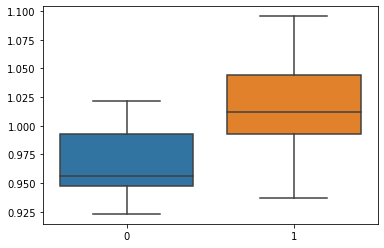

In [ ]:
# Use the same weights and noise variance, but vary the number of training samples. But first, for each number of training samples, try new random seeds (say 11 to 21) to generate the training data. Have a good number of validation samples. What you are looking for is the mean and variance (spread) of NMRSE.
import random
import numpy as np
import seaborn as sns

featureDimension = 10
weights = np.random.rand(1, featureDimension)
bias = 1
noise_variance = 0.25
Lambda = 0

def nrmse(mse, noise_variance):
  return np.sqrt(mse) / np.sqrt(noise_variance)


# Generating training datasets with different number of training samples
random.seed(11)
x1 = generateDataMatrix(100, featureDimension)

random.seed(12)
x2 = generateDataMatrix(200, featureDimension)

random.seed(13)
x3 = generateDataMatrix(300, featureDimension)

random.seed(14)
x4 = generateDataMatrix(400, featureDimension)

random.seed(15)
x5 = generateDataMatrix(500, featureDimension)

random.seed(16)
x6 = generateDataMatrix(600, featureDimension)

random.seed(17)
x7 = generateDataMatrix(700, featureDimension)

random.seed(18)
x8 = generateDataMatrix(800, featureDimension)

random.seed(19)
x9 = generateDataMatrix(900, featureDimension)

random.seed(20)
x10 = generateDataMatrix(1000, featureDimension)

# Now I have generated 10 training datasets. Now I would be splitting each training dataset into a training and validation dataset on a 80-20 split-ratio.
training_data1, validation_data1 = x1[:80,], x1[-20:,]
t1 = generateTargetVector(training_data1, weights, bias, noise_variance)
v1 = generateTargetVector(validation_data1, weights, bias, noise_variance)

training_data2, validation_data2 = x2[:160,], x2[-40:,]
t2 = generateTargetVector(training_data2, weights, bias, noise_variance)
v2 = generateTargetVector(validation_data2, weights, bias, noise_variance)

training_data3, validation_data3 = x3[:240,], x3[-60:,]
t3 = generateTargetVector(training_data3, weights, bias, noise_variance)
v3 = generateTargetVector(validation_data3, weights, bias, noise_variance)

training_data4, validation_data4 = x4[:320,], x4[-80:,]
t4 = generateTargetVector(training_data4, weights, bias, noise_variance)
v4 = generateTargetVector(validation_data4, weights, bias, noise_variance)

training_data5, validation_data5 = x5[:400,], x5[-100:,]
t5 = generateTargetVector(training_data5, weights, bias, noise_variance)
v5 = generateTargetVector(validation_data5, weights, bias, noise_variance)

training_data6, validation_data6 = x6[:480,], x6[-120:,]
t6 = generateTargetVector(training_data6, weights, bias, noise_variance)
v6 = generateTargetVector(validation_data6, weights, bias, noise_variance)

training_data7, validation_data7 = x7[:560,], x7[-140:,]
t7 = generateTargetVector(training_data7, weights, bias, noise_variance)
v7 = generateTargetVector(validation_data7, weights, bias, noise_variance)

training_data8, validation_data8 = x8[:640,], x8[-160:,]
t8 = generateTargetVector(training_data8, weights, bias, noise_variance)
v8 = generateTargetVector(validation_data8, weights, bias, noise_variance)

training_data9, validation_data9 = x9[:720,], x9[-180:,]
t9 = generateTargetVector(training_data9, weights, bias, noise_variance)
v9 = generateTargetVector(validation_data9, weights, bias, noise_variance)

training_data10, validation_data10 = x10[:800,], x10[-200:,]
t10 = generateTargetVector(training_data10, weights, bias, noise_variance)
v10 = generateTargetVector(validation_data10, weights, bias, noise_variance)

w_t1, mse_t1, y_t1 = estimateWeights(training_data1, t1, Lambda)
w_t2, mse_t2, y_t2 = estimateWeights(training_data2, t2, Lambda)
w_t3, mse_t3, y_t3 = estimateWeights(training_data3, t3, Lambda)
w_t4, mse_t4, y_t4 = estimateWeights(training_data4, t4, Lambda)
w_t5, mse_t5, y_t5 = estimateWeights(training_data5, t5, Lambda)
w_t6, mse_t6, y_t6 = estimateWeights(training_data6, t6, Lambda)
w_t7, mse_t7, y_t7 = estimateWeights(training_data7, t7, Lambda)
w_t8, mse_t8, y_t8 = estimateWeights(training_data8, t8, Lambda)
w_t9, mse_t9, y_t9 = estimateWeights(training_data9, t9, Lambda)
w_t10, mse_t10, y_t10 = estimateWeights(training_data10, t10, Lambda)

mse_v1 = computeMSE(computeLRestimate(validation_data1, w_t1), v1)
mse_v2 = computeMSE(computeLRestimate(validation_data2, w_t2), v2)
mse_v3 = computeMSE(computeLRestimate(validation_data3, w_t3), v3)
mse_v4 = computeMSE(computeLRestimate(validation_data4, w_t4), v4)
mse_v5 = computeMSE(computeLRestimate(validation_data5, w_t5), v5)
mse_v6 = computeMSE(computeLRestimate(validation_data6, w_t6), v6)
mse_v7 = computeMSE(computeLRestimate(validation_data7, w_t7), v7)
mse_v8 = computeMSE(computeLRestimate(validation_data8, w_t8), v8)
mse_v9 = computeMSE(computeLRestimate(validation_data9, w_t9), v9)
mse_v10 = computeMSE(computeLRestimate(validation_data10, w_t10), v10)

mse_t = np.array([mse_t1, mse_t2, mse_t3, mse_t4, mse_t5, mse_t6, mse_t7, mse_t8, mse_t9, mse_t10])
mse_v = np.array([mse_v1, mse_v2, mse_v3, mse_v4, mse_v5, mse_v6, mse_v7, mse_v8, mse_v9, mse_v10])

nrmse_t = nrmse(mse_t, noise_variance)
nrmse_v = nrmse(mse_v, noise_variance)

plot_arr = [nrmse_t, nrmse_v]
sns.boxplot(data=plot_arr)


# Observations : 

1.   Spread of Validation_NRMSE > Spread of Training_NRMSE
2.   Mean of Validation_NRMSE > Mean of Training_NRMSE

# Potential Reason :    
The validation_NRMSE error is generally higher than Training_NRMSE because the error is computed on an unknown dataset that the model hasn't seen.


#Task 13 (b) : Training and validation NRMSE obtained using pseudo inverse with number of variables

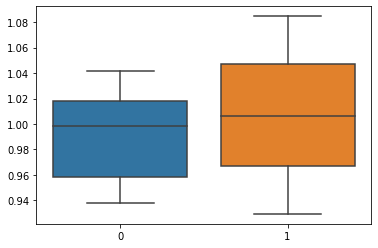

In [ ]:
import random
import numpy as np
import seaborn as sns

NumberOfSamples = 1000
bias = 1
noise_variance = 0.25
Lambda = 0

def nrmse(mse, noise_variance):
  return np.sqrt(mse) / np.sqrt(noise_variance)

# Generating training datasets with different number of training samples
random.seed(11)
x1 = generateDataMatrix(NumberOfSamples, 5)
w1 = np.random.rand(1, 5)

random.seed(12)
x2 = generateDataMatrix(NumberOfSamples, 7)
w2 = np.random.rand(1, 7)

random.seed(13)
x3 = generateDataMatrix(NumberOfSamples, 9)
w3 = np.random.rand(1, 9)

random.seed(14)
x4 = generateDataMatrix(NumberOfSamples, 11)
w4 = np.random.rand(1, 11)

random.seed(15)
x5 = generateDataMatrix(NumberOfSamples, 13)
w5 = np.random.rand(1, 13)

random.seed(16)
x6 = generateDataMatrix(NumberOfSamples, 15)
w6 = np.random.rand(1, 15)

random.seed(17)
x7 = generateDataMatrix(NumberOfSamples, 17)
w7 = np.random.rand(1, 17)

random.seed(18)
x8 = generateDataMatrix(NumberOfSamples, 19)
w8 = np.random.rand(1, 19)

random.seed(19)
x9 = generateDataMatrix(NumberOfSamples, 21)
w9 = np.random.rand(1, 21)

random.seed(20)
x10 = generateDataMatrix(NumberOfSamples, 23)
w10 = np.random.rand(1, 23)

# Now I have generated 10 training datasets. Now I would be splitting each training dataset into a training and validation dataset on a 80-20 split-ratio.
training_data1, validation_data1 = x1[:800,], x1[-200:,]
t1 = generateTargetVector(training_data1, w1, bias, noise_variance)
v1 = generateTargetVector(validation_data1, w1, bias, noise_variance)

training_data2, validation_data2 = x2[:800,], x2[-200:,]
t2 = generateTargetVector(training_data2, w2, bias, noise_variance)
v2 = generateTargetVector(validation_data2, w2, bias, noise_variance)

training_data3, validation_data3 = x3[:800,], x3[-200:,]
t3 = generateTargetVector(training_data3, w3, bias, noise_variance)
v3 = generateTargetVector(validation_data3, w3, bias, noise_variance)

training_data4, validation_data4 = x4[:800,], x4[-200:,]
t4 = generateTargetVector(training_data4, w4, bias, noise_variance)
v4 = generateTargetVector(validation_data4, w4, bias, noise_variance)

training_data5, validation_data5 = x5[:800,], x5[-200:,]
t5 = generateTargetVector(training_data5, w5, bias, noise_variance)
v5 = generateTargetVector(validation_data5, w5, bias, noise_variance)

training_data6, validation_data6 = x6[:800,], x6[-200:,]
t6 = generateTargetVector(training_data6, w6, bias, noise_variance)
v6 = generateTargetVector(validation_data6, w6, bias, noise_variance)

training_data7, validation_data7 = x7[:800,], x7[-200:,]
t7 = generateTargetVector(training_data7, w7, bias, noise_variance)
v7 = generateTargetVector(validation_data7, w7, bias, noise_variance)

training_data8, validation_data8 = x8[:800,], x8[-200:,]
t8 = generateTargetVector(training_data8, w8, bias, noise_variance)
v8 = generateTargetVector(validation_data8, w8, bias, noise_variance)

training_data9, validation_data9 = x9[:800,], x9[-200:,]
t9 = generateTargetVector(training_data9, w9, bias, noise_variance)
v9 = generateTargetVector(validation_data9, w9, bias, noise_variance)

training_data10, validation_data10 = x10[:800,], x10[-200:,]
t10 = generateTargetVector(training_data10, w10, bias, noise_variance)
v10 = generateTargetVector(validation_data10, w10, bias, noise_variance)

w_t1, mse_t1, y_t1 = estimateWeights(training_data1, t1, Lambda)
w_t2, mse_t2, y_t2 = estimateWeights(training_data2, t2, Lambda)
w_t3, mse_t3, y_t3 = estimateWeights(training_data3, t3, Lambda)
w_t4, mse_t4, y_t4 = estimateWeights(training_data4, t4, Lambda)
w_t5, mse_t5, y_t5 = estimateWeights(training_data5, t5, Lambda)
w_t6, mse_t6, y_t6 = estimateWeights(training_data6, t6, Lambda)
w_t7, mse_t7, y_t7 = estimateWeights(training_data7, t7, Lambda)
w_t8, mse_t8, y_t8 = estimateWeights(training_data8, t8, Lambda)
w_t9, mse_t9, y_t9 = estimateWeights(training_data9, t9, Lambda)
w_t10, mse_t10, y_t10 = estimateWeights(training_data10, t10, Lambda)

mse_v1 = computeMSE(computeLRestimate(validation_data1, w_t1), v1)
mse_v2 = computeMSE(computeLRestimate(validation_data2, w_t2), v2)
mse_v3 = computeMSE(computeLRestimate(validation_data3, w_t3), v3)
mse_v4 = computeMSE(computeLRestimate(validation_data4, w_t4), v4)
mse_v5 = computeMSE(computeLRestimate(validation_data5, w_t5), v5)
mse_v6 = computeMSE(computeLRestimate(validation_data6, w_t6), v6)
mse_v7 = computeMSE(computeLRestimate(validation_data7, w_t7), v7)
mse_v8 = computeMSE(computeLRestimate(validation_data8, w_t8), v8)
mse_v9 = computeMSE(computeLRestimate(validation_data9, w_t9), v9)
mse_v10 = computeMSE(computeLRestimate(validation_data10, w_t10), v10)

mse_t = np.array([mse_t1, mse_t2, mse_t3, mse_t4, mse_t5, mse_t6, mse_t7, mse_t8, mse_t9, mse_t10])
mse_v = np.array([mse_v1, mse_v2, mse_v3, mse_v4, mse_v5, mse_v6, mse_v7, mse_v8, mse_v9, mse_v10])

nrmse_t = nrmse(mse_t, noise_variance)
nrmse_v = nrmse(mse_v, noise_variance)

plot_arr = [nrmse_t, nrmse_v]
sns.boxplot(data=plot_arr)


# Observations : 

1.   Spread of Validation_NRMSE > Spread of Training_NRMSE
2.   Mean of Validation_NRMSE > Mean of Training_NRMSE

# Potential Reason :    
The validation_NRMSE error is generally higher than Training_NRMSE because the error is computed on an unknown dataset that the model hasn't seen.

#Task 13 (c) : Training and validation NRMSE obtained using pseudo inverse with noise variance

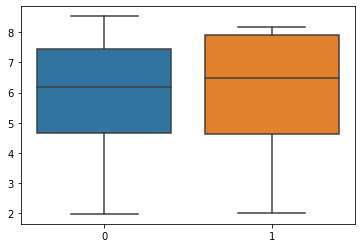

In [ ]:
# noise_variance range -> [1, 20]
# std_dev range -> [1, sqrt(20)]

import random
import numpy as np
import seaborn as sns

NumberOfSamples = 1000
FeatureDimension = 15
w = np.random.rand(1, FeatureDimension)
bias = 1
Lambda = 0

def nrmse(mse, noise_variance):
  return np.sqrt(mse) / np.sqrt(noise_variance)

# Generating training datasets with different number of training samples
random.seed(11)
x1 = generateDataMatrix(NumberOfSamples, FeatureDimension)

random.seed(12)
x2 = generateDataMatrix(NumberOfSamples, FeatureDimension)

random.seed(13)
x3 = generateDataMatrix(NumberOfSamples, FeatureDimension)

random.seed(14)
x4 = generateDataMatrix(NumberOfSamples, FeatureDimension)

random.seed(15)
x5 = generateDataMatrix(NumberOfSamples, FeatureDimension)

random.seed(16)
x6 = generateDataMatrix(NumberOfSamples, FeatureDimension)

random.seed(17)
x7 = generateDataMatrix(NumberOfSamples, FeatureDimension)

random.seed(18)
x8 = generateDataMatrix(NumberOfSamples, FeatureDimension)

random.seed(19)
x9 = generateDataMatrix(NumberOfSamples, FeatureDimension)

random.seed(20)
x10 = generateDataMatrix(NumberOfSamples, FeatureDimension)

# Now I have generated 10 training datasets. Now I would be splitting each training dataset into a training and validation dataset on a 80-20 split-ratio.
training_data1, validation_data1 = x1[:800,], x1[-200:,]
t1 = generateTargetVector(training_data1, w, bias, 1)
v1 = generateTargetVector(validation_data1, w, bias, 1)

training_data2, validation_data2 = x2[:800,], x2[-200:,]
t2 = generateTargetVector(training_data2, w, bias, 3)
v2 = generateTargetVector(validation_data2, w, bias, 3)

training_data3, validation_data3 = x3[:800,], x3[-200:,]
t3 = generateTargetVector(training_data3, w, bias, 5)
v3 = generateTargetVector(validation_data3, w, bias, 5)

training_data4, validation_data4 = x4[:800,], x4[-200:,]
t4 = generateTargetVector(training_data4, w, bias, 7)
v4 = generateTargetVector(validation_data4, w, bias, 7)

training_data5, validation_data5 = x5[:800,], x5[-200:,]
t5 = generateTargetVector(training_data5, w, bias, 9)
v5 = generateTargetVector(validation_data5, w, bias, 9)

training_data6, validation_data6 = x6[:800,], x6[-200:,]
t6 = generateTargetVector(training_data6, w, bias, 11)
v6 = generateTargetVector(validation_data6, w, bias, 11)

training_data7, validation_data7 = x7[:800,], x7[-200:,]
t7 = generateTargetVector(training_data7, w, bias, 13)
v7 = generateTargetVector(validation_data7, w, bias, 13)

training_data8, validation_data8 = x8[:800,], x8[-200:,]
t8 = generateTargetVector(training_data8, w, bias, 15)
v8 = generateTargetVector(validation_data8, w, bias, 15)

training_data9, validation_data9 = x9[:800,], x9[-200:,]
t9 = generateTargetVector(training_data9, w, bias, 17)
v9 = generateTargetVector(validation_data9, w, bias, 17)

training_data10, validation_data10 = x10[:800,], x10[-200:,]
t10 = generateTargetVector(training_data10, w, bias, 19)
v10 = generateTargetVector(validation_data10, w, bias, 19)

w_t1, mse_t1, y_t1 = estimateWeights(training_data1, t1, Lambda)
w_t2, mse_t2, y_t2 = estimateWeights(training_data2, t2, Lambda)
w_t3, mse_t3, y_t3 = estimateWeights(training_data3, t3, Lambda)
w_t4, mse_t4, y_t4 = estimateWeights(training_data4, t4, Lambda)
w_t5, mse_t5, y_t5 = estimateWeights(training_data5, t5, Lambda)
w_t6, mse_t6, y_t6 = estimateWeights(training_data6, t6, Lambda)
w_t7, mse_t7, y_t7 = estimateWeights(training_data7, t7, Lambda)
w_t8, mse_t8, y_t8 = estimateWeights(training_data8, t8, Lambda)
w_t9, mse_t9, y_t9 = estimateWeights(training_data9, t9, Lambda)
w_t10, mse_t10, y_t10 = estimateWeights(training_data10, t10, Lambda)

mse_v1 = computeMSE(computeLRestimate(validation_data1, w_t1), v1)
mse_v2 = computeMSE(computeLRestimate(validation_data2, w_t2), v2)
mse_v3 = computeMSE(computeLRestimate(validation_data3, w_t3), v3)
mse_v4 = computeMSE(computeLRestimate(validation_data4, w_t4), v4)
mse_v5 = computeMSE(computeLRestimate(validation_data5, w_t5), v5)
mse_v6 = computeMSE(computeLRestimate(validation_data6, w_t6), v6)
mse_v7 = computeMSE(computeLRestimate(validation_data7, w_t7), v7)
mse_v8 = computeMSE(computeLRestimate(validation_data8, w_t8), v8)
mse_v9 = computeMSE(computeLRestimate(validation_data9, w_t9), v9)
mse_v10 = computeMSE(computeLRestimate(validation_data10, w_t10), v10)

mse_t = np.array([mse_t1, mse_t2, mse_t3, mse_t4, mse_t5, mse_t6, mse_t7, mse_t8, mse_t9, mse_t10])
mse_v = np.array([mse_v1, mse_v2, mse_v3, mse_v4, mse_v5, mse_v6, mse_v7, mse_v8, mse_v9, mse_v10])

nrmse_t = nrmse(mse_t, noise_variance)
nrmse_v = nrmse(mse_v, noise_variance)

plot_arr = [nrmse_t, nrmse_v]
sns.boxplot(data=plot_arr)

# Observations : 

1.   Validation_NRMSE in part (c) > Validation_NRMSE in part (a)
2.   Validation_NRMSE in part (c) > Validation_NRMSE in part (b)
3. Training_NRMSE in part (c) > Training_NRMSE in part (a)
4.   Training_NRMSE in part (c) > Training_NRMSE in part (b)

# Potential Reason :    
The increase in Validation_NRMSE can be because of the variance of the noise present in the target vector due to which it is becoming difficult for the model to generalize over unseen data.

The increase in Training_NRMSE can be because of the variance of the noise present in the target vector due to which it is becoming difficult for the model to fit over training data.

#Task 13 (d) : Training and validation NRMSE obtained using pseudo inverse with w0 i.e. the bias term

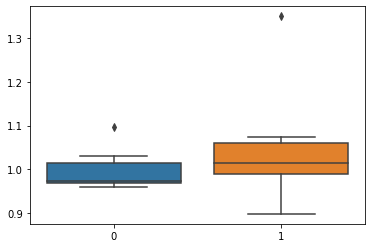

In [ ]:
import random
import numpy as np
import seaborn as sns

NumberOfSamples = 1000
FeatureDimension = 15
w = np.random.rand(1, FeatureDimension)
noise_variance = 0.25
Lambda = 0

def nrmse(mse, noise_variance):
  return np.sqrt(mse) / np.sqrt(noise_variance)

# Generating training datasets with different number of training samples
random.seed(11)
x1 = generateDataMatrix(NumberOfSamples, FeatureDimension)
b1 = np.random.randn()

random.seed(12)
x2 = generateDataMatrix(NumberOfSamples, FeatureDimension)
b2 = np.random.randn()

random.seed(13)
x3 = generateDataMatrix(NumberOfSamples, FeatureDimension)
b3 = np.random.randn()

random.seed(14)
x4 = generateDataMatrix(NumberOfSamples, FeatureDimension)
b4 = np.random.randn()

random.seed(15)
x5 = generateDataMatrix(NumberOfSamples, FeatureDimension)
b5 = np.random.randn()

random.seed(16)
x6 = generateDataMatrix(NumberOfSamples, FeatureDimension)
b6 = np.random.randn()

random.seed(17)
x7 = generateDataMatrix(NumberOfSamples, FeatureDimension)
b7 = np.random.randn()

random.seed(18)
x8 = generateDataMatrix(NumberOfSamples, FeatureDimension)
b8 = np.random.randn()

random.seed(19)
x9 = generateDataMatrix(NumberOfSamples, FeatureDimension)
b9 = np.random.randn()

random.seed(20)
x10 = generateDataMatrix(NumberOfSamples, FeatureDimension)
b10 = np.random.randn()

# Now I have generated 10 training datasets. Now I would be splitting each training dataset into a training and validation dataset on a 80-20 split-ratio.
training_data1, validation_data1 = x1[:800,], x1[-200:,]
t1 = generateTargetVector(training_data1, w, b1, noise_variance)
v1 = generateTargetVector(validation_data1, w, b1, noise_variance)

training_data2, validation_data2 = x2[:800,], x2[-200:,]
t2 = generateTargetVector(training_data2, w, b2, noise_variance)
v2 = generateTargetVector(validation_data2, w, b2, noise_variance)

training_data3, validation_data3 = x3[:800,], x3[-200:,]
t3 = generateTargetVector(training_data3, w, b3, noise_variance)
v3 = generateTargetVector(validation_data3, w, b3, noise_variance)

training_data4, validation_data4 = x4[:800,], x4[-200:,]
t4 = generateTargetVector(training_data4, w, b4, noise_variance)
v4 = generateTargetVector(validation_data4, w, b4, noise_variance)

training_data5, validation_data5 = x5[:800,], x5[-200:,]
t5 = generateTargetVector(training_data5, w, b5, noise_variance)
v5 = generateTargetVector(validation_data5, w, b6, noise_variance)

training_data6, validation_data6 = x6[:800,], x6[-200:,]
t6 = generateTargetVector(training_data6, w, b6, noise_variance)
v6 = generateTargetVector(validation_data6, w, b6, noise_variance)

training_data7, validation_data7 = x7[:800,], x7[-200:,]
t7 = generateTargetVector(training_data7, w, b7, noise_variance)
v7 = generateTargetVector(validation_data7, w, b7, noise_variance)

training_data8, validation_data8 = x8[:800,], x8[-200:,]
t8 = generateTargetVector(training_data8, w, b8, noise_variance)
v8 = generateTargetVector(validation_data8, w, b8, noise_variance)

training_data9, validation_data9 = x9[:800,], x9[-200:,]
t9 = generateTargetVector(training_data9, w, b9, noise_variance)
v9 = generateTargetVector(validation_data9, w, b9, noise_variance)

training_data10, validation_data10 = x10[:800,], x10[-200:,]
t10 = generateTargetVector(training_data10, w, b10, noise_variance)
v10 = generateTargetVector(validation_data10, w, b10, noise_variance)

w_t1, mse_t1, y_t1 = estimateWeights(training_data1, t1, Lambda)
w_t2, mse_t2, y_t2 = estimateWeights(training_data2, t2, Lambda)
w_t3, mse_t3, y_t3 = estimateWeights(training_data3, t3, Lambda)
w_t4, mse_t4, y_t4 = estimateWeights(training_data4, t4, Lambda)
w_t5, mse_t5, y_t5 = estimateWeights(training_data5, t5, Lambda)
w_t6, mse_t6, y_t6 = estimateWeights(training_data6, t6, Lambda)
w_t7, mse_t7, y_t7 = estimateWeights(training_data7, t7, Lambda)
w_t8, mse_t8, y_t8 = estimateWeights(training_data8, t8, Lambda)
w_t9, mse_t9, y_t9 = estimateWeights(training_data9, t9, Lambda)
w_t10, mse_t10, y_t10 = estimateWeights(training_data10, t10, Lambda)

mse_v1 = computeMSE(computeLRestimate(validation_data1, w_t1), v1)
mse_v2 = computeMSE(computeLRestimate(validation_data2, w_t2), v2)
mse_v3 = computeMSE(computeLRestimate(validation_data3, w_t3), v3)
mse_v4 = computeMSE(computeLRestimate(validation_data4, w_t4), v4)
mse_v5 = computeMSE(computeLRestimate(validation_data5, w_t5), v5)
mse_v6 = computeMSE(computeLRestimate(validation_data6, w_t6), v6)
mse_v7 = computeMSE(computeLRestimate(validation_data7, w_t7), v7)
mse_v8 = computeMSE(computeLRestimate(validation_data8, w_t8), v8)
mse_v9 = computeMSE(computeLRestimate(validation_data9, w_t9), v9)
mse_v10 = computeMSE(computeLRestimate(validation_data10, w_t10), v10)

mse_t = np.array([mse_t1, mse_t2, mse_t3, mse_t4, mse_t5, mse_t6, mse_t7, mse_t8, mse_t9, mse_t10])
mse_v = np.array([mse_v1, mse_v2, mse_v3, mse_v4, mse_v5, mse_v6, mse_v7, mse_v8, mse_v9, mse_v10])

nrmse_t = nrmse(mse_t, noise_variance)
nrmse_v = nrmse(mse_v, noise_variance)

plot_arr = [nrmse_t, nrmse_v]
sns.boxplot(data=plot_arr)

# Observations : 

1.   We can notice 1 outlier each for both the classes i.e. (Training_NRMSE and Validation_NRMSE)
2.   Spread for Validation_NRMSE > Spread for Training_NRMSE
3. Upon comparing with the Validation_NRMSE obtained for (a) and (b), the Validation_NRMSE obtained in this case is closer to 0.

# Potential Reason :    
The introduction of the bias term allows us to shift the hyperplane in an attempt to better fit the data without the risk of overfitting 

#Task 13 (e) : Training and validation NRMSE obtained using pseudo inverse with lambda2

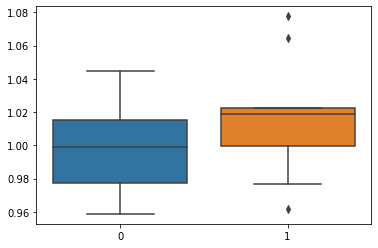

In [ ]:
import random
import numpy as np
import seaborn as sns

NumberOfSamples = 1000
FeatureDimension = 15
w = np.random.rand(1, FeatureDimension)
noise_variance = 0.25
bias = 1

def nrmse(mse, noise_variance):
  return np.sqrt(mse) / np.sqrt(noise_variance)

# Generating training datasets with different number of training samples
random.seed(11)
x1 = generateDataMatrix(NumberOfSamples, FeatureDimension)

random.seed(12)
x2 = generateDataMatrix(NumberOfSamples, FeatureDimension)

random.seed(13)
x3 = generateDataMatrix(NumberOfSamples, FeatureDimension)

random.seed(14)
x4 = generateDataMatrix(NumberOfSamples, FeatureDimension)

random.seed(15)
x5 = generateDataMatrix(NumberOfSamples, FeatureDimension)

random.seed(16)
x6 = generateDataMatrix(NumberOfSamples, FeatureDimension)

random.seed(17)
x7 = generateDataMatrix(NumberOfSamples, FeatureDimension)

random.seed(18)
x8 = generateDataMatrix(NumberOfSamples, FeatureDimension)

random.seed(19)
x9 = generateDataMatrix(NumberOfSamples, FeatureDimension)

random.seed(20)
x10 = generateDataMatrix(NumberOfSamples, FeatureDimension)

# Now I have generated 10 training datasets. Now I would be splitting each training dataset into a training and validation dataset on a 80-20 split-ratio.
training_data1, validation_data1 = x1[:800,], x1[-200:,]
t1 = generateTargetVector(training_data1, w, bias, noise_variance)
v1 = generateTargetVector(validation_data1, w, bias, noise_variance)

training_data2, validation_data2 = x2[:800,], x2[-200:,]
t2 = generateTargetVector(training_data2, w, bias, noise_variance)
v2 = generateTargetVector(validation_data2, w, bias, noise_variance)

training_data3, validation_data3 = x3[:800,], x3[-200:,]
t3 = generateTargetVector(training_data3, w, bias, noise_variance)
v3 = generateTargetVector(validation_data3, w, bias, noise_variance)

training_data4, validation_data4 = x4[:800,], x4[-200:,]
t4 = generateTargetVector(training_data4, w, bias, noise_variance)
v4 = generateTargetVector(validation_data4, w, bias, noise_variance)

training_data5, validation_data5 = x5[:800,], x5[-200:,]
t5 = generateTargetVector(training_data5, w, bias, noise_variance)
v5 = generateTargetVector(validation_data5, w, bias, noise_variance)

training_data6, validation_data6 = x6[:800,], x6[-200:,]
t6 = generateTargetVector(training_data6, w, bias, noise_variance)
v6 = generateTargetVector(validation_data6, w, bias, noise_variance)

training_data7, validation_data7 = x7[:800,], x7[-200:,]
t7 = generateTargetVector(training_data7, w, bias, noise_variance)
v7 = generateTargetVector(validation_data7, w, bias, noise_variance)

training_data8, validation_data8 = x8[:800,], x8[-200:,]
t8 = generateTargetVector(training_data8, w, bias, noise_variance)
v8 = generateTargetVector(validation_data8, w, bias, noise_variance)

training_data9, validation_data9 = x9[:800,], x9[-200:,]
t9 = generateTargetVector(training_data9, w, bias, noise_variance)
v9 = generateTargetVector(validation_data9, w, bias, noise_variance)

training_data10, validation_data10 = x10[:800,], x10[-200:,]
t10 = generateTargetVector(training_data10, w, bias, noise_variance)
v10 = generateTargetVector(validation_data10, w, bias, noise_variance)

w_t1, mse_t1, y_t1 = estimateWeights(training_data1, t1, 0.1)
w_t2, mse_t2, y_t2 = estimateWeights(training_data2, t2, 0.2)
w_t3, mse_t3, y_t3 = estimateWeights(training_data3, t3, 0.3)
w_t4, mse_t4, y_t4 = estimateWeights(training_data4, t4, 0.4)
w_t5, mse_t5, y_t5 = estimateWeights(training_data5, t5, 0.5)
w_t6, mse_t6, y_t6 = estimateWeights(training_data6, t6, 0.6)
w_t7, mse_t7, y_t7 = estimateWeights(training_data7, t7, 0.7)
w_t8, mse_t8, y_t8 = estimateWeights(training_data8, t8, 0.8)
w_t9, mse_t9, y_t9 = estimateWeights(training_data9, t9, 0.9)
w_t10, mse_t10, y_t10 = estimateWeights(training_data10, t10, 1)

mse_v1 = computeMSE(computeLRestimate(validation_data1, w_t1), v1)
mse_v2 = computeMSE(computeLRestimate(validation_data2, w_t2), v2)
mse_v3 = computeMSE(computeLRestimate(validation_data3, w_t3), v3)
mse_v4 = computeMSE(computeLRestimate(validation_data4, w_t4), v4)
mse_v5 = computeMSE(computeLRestimate(validation_data5, w_t5), v5)
mse_v6 = computeMSE(computeLRestimate(validation_data6, w_t6), v6)
mse_v7 = computeMSE(computeLRestimate(validation_data7, w_t7), v7)
mse_v8 = computeMSE(computeLRestimate(validation_data8, w_t8), v8)
mse_v9 = computeMSE(computeLRestimate(validation_data9, w_t9), v9)
mse_v10 = computeMSE(computeLRestimate(validation_data10, w_t10), v10)

mse_t = np.array([mse_t1, mse_t2, mse_t3, mse_t4, mse_t5, mse_t6, mse_t7, mse_t8, mse_t9, mse_t10])
mse_v = np.array([mse_v1, mse_v2, mse_v3, mse_v4, mse_v5, mse_v6, mse_v7, mse_v8, mse_v9, mse_v10])

nrmse_t = nrmse(mse_t, noise_variance)
nrmse_v = nrmse(mse_v, noise_variance)

plot_arr = [nrmse_t, nrmse_v]
sns.boxplot(data=plot_arr)

# Observations : 

1.   We can notice 3 outliers for class-1 i.e. (Validation_NRMSE)
2.   Spread for Validation_NRMSE < Spread for Training_NRMSE
3. Upon comparing with the Validation_NRMSE obtained for (a) and (b), the Validation_NRMSE obtained in this case is further away from 0.

# Potential Reason :    
The introduction of the regularization term makes sure that our model is not overfitting to the training data. This allows it to generalize better on unseen data. In this way, the L2 regularization deals with independent variables that are highly correlated by constricting the coefficient and keeping all the variables. 


#Task 13 (f) : Time taken to solve pseudo inverse with number of samples and number of variables and its breaking points


Text(0, 0.5, 'Time Taken for Pseudo Inverse')

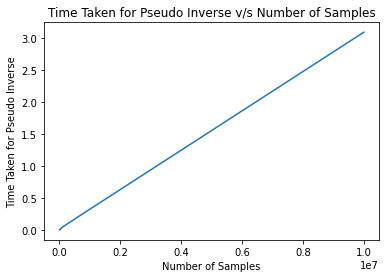

In [ ]:
# Different number of samples in powers of 10

import random
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

featureDimension = 10
weights = np.random.rand(1, featureDimension)
bias = 1
noise_variance = 0.25
Lambda = 0

def nrmse(mse, noise_variance):
  return np.sqrt(mse) / np.sqrt(noise_variance)

# Generating training datasets with different number of training samples
random.seed(10)
x1 = generateDataMatrix(10, featureDimension)
t1 = generateTargetVector(x1, weights, bias, noise_variance)

x2 = generateDataMatrix(100, featureDimension)
t2 = generateTargetVector(x2, weights, bias, noise_variance)

x3 = generateDataMatrix(1000, featureDimension)
t3 = generateTargetVector(x3, weights, bias, noise_variance)

x4 = generateDataMatrix(10000, featureDimension)
t4 = generateTargetVector(x4, weights, bias, noise_variance)

x5 = generateDataMatrix(100000, featureDimension)
t5 = generateTargetVector(x5, weights, bias, noise_variance)

x6 = generateDataMatrix(1000000, featureDimension)
t6 = generateTargetVector(x6, weights, bias, noise_variance)

x7 = generateDataMatrix(10000000, featureDimension)
t7 = generateTargetVector(x7, weights, bias, noise_variance)


time_samples = []

start = time.time()
w_t1, mse_t1, y_t1 = estimateWeights(x1, t1, Lambda)
end = time.time()
time_samples.append(end-start)

start = time.time()
w_t2, mse_t2, y_t2 = estimateWeights(x2, t2, Lambda)
end = time.time()
time_samples.append(end-start)

start = time.time()
w_t3, mse_t3, y_t3 = estimateWeights(x3, t3, Lambda)
end = time.time()
time_samples.append(end-start)

start = time.time()
w_t4, mse_t4, y_t4 = estimateWeights(x4, t4, Lambda)
end = time.time()
time_samples.append(end-start)

start = time.time()
w_t5, mse_t5, y_t5 = estimateWeights(x5, t5, Lambda)
end = time.time()
time_samples.append(end-start)

start = time.time()
w_t6, mse_t6, y_t6 = estimateWeights(x6, t6, Lambda)
end = time.time()
time_samples.append(end-start)

start = time.time()
w_t7, mse_t7, y_t7 = estimateWeights(x7, t7, Lambda)
end = time.time()
time_samples.append(end-start)

time_samples = np.array(time_samples)
n_samples = np.array([10, 100, 1000, 10000, 100000, 1000000, 10000000]) # Google Colab crashes when I use n_sample = 100000000

plt.plot(n_samples, time_samples)
plt.title("Time Taken for Pseudo Inverse v/s Number of Samples")
plt.xlabel("Number of Samples")
plt.ylabel("Time Taken for Pseudo Inverse")

# Observations : 

1.  The plot between Time Taken for Pseudo Inverse v/s Number of Samples is Linear
2. The breaking point in terms of number of samples = 100000000

# Potential Reason :    
As the number of rows increase, computing the pseudo inverse of the matrix increases linearly
The RAM of the virtual machine Google colab had assigned me crashes when the number of rows = number of samples = 100000000


Text(0, 0.5, 'Time Taken for Pseudo Inverse')

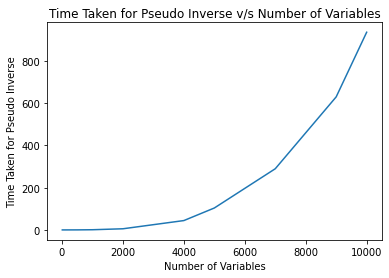

In [157]:
# Different number of variables in powers of 10

import random
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

NumberOfSamples = 1000
bias = 1
noise_variance = 0.25
Lambda = 0

def nrmse(mse, noise_variance):
  return np.sqrt(mse) / np.sqrt(noise_variance)

# Generating training datasets with different number of training samples
random.seed(11)
x1 = generateDataMatrix(NumberOfSamples, 10)
w1 = np.random.rand(1, np.shape(x1)[1])
t1 = generateTargetVector(x1, w1, bias, noise_variance)

x2 = generateDataMatrix(NumberOfSamples, 100)
w2 = np.random.rand(1, np.shape(x2)[1])
t2 = generateTargetVector(x2, w2, bias, noise_variance)

x3 = generateDataMatrix(NumberOfSamples, 500)
w3 = np.random.rand(1, np.shape(x3)[1])
t3 = generateTargetVector(x3, w3, bias, noise_variance)

x4 = generateDataMatrix(NumberOfSamples, 1000)
w4 = np.random.rand(1, np.shape(x4)[1])
t4 = generateTargetVector(x4, w4, bias, noise_variance)

x5 = generateDataMatrix(NumberOfSamples, 2000)
w5 = np.random.rand(1, np.shape(x5)[1])
t5 = generateTargetVector(x5, w5, bias, noise_variance)

x6 = generateDataMatrix(NumberOfSamples, 4000)
w6 = np.random.rand(1, np.shape(x6)[1])
t6 = generateTargetVector(x6, w6, bias, noise_variance)

x7 = generateDataMatrix(NumberOfSamples, 5000)
w7 = np.random.rand(1, np.shape(x7)[1])
t7 = generateTargetVector(x7, w7, bias, noise_variance)

x8 = generateDataMatrix(NumberOfSamples, 7000)
w8 = np.random.rand(1, np.shape(x8)[1])
t8 = generateTargetVector(x8, w8, bias, noise_variance)

x9 = generateDataMatrix(NumberOfSamples, 9000)
w9 = np.random.rand(1, np.shape(x9)[1])
t9 = generateTargetVector(x9, w9, bias, noise_variance)

x10 = generateDataMatrix(NumberOfSamples, 10000)
w10 = np.random.rand(1, np.shape(x10)[1])
t10 = generateTargetVector(x10, w10, bias, noise_variance)

time_vars = []

start = time.time()
w_t1, mse_t1, y_t1 = estimateWeights(x1, t1, Lambda)
end = time.time()
time_vars.append(end-start)

start = time.time()
w_t2, mse_t2, y_t2 = estimateWeights(x2, t2, Lambda)
end = time.time()
time_vars.append(end-start)

start = time.time()
w_t3, mse_t3, y_t3 = estimateWeights(x3, t3, Lambda)
end = time.time()
time_vars.append(end-start)

start = time.time()
w_t4, mse_t4, y_t4 = estimateWeights(x4, t4, Lambda)
end = time.time()
time_vars.append(end-start)

start = time.time()
w_t5, mse_t5, y_t5 = estimateWeights(x5, t5, Lambda)
end = time.time()
time_vars.append(end-start)

start = time.time()
w_t6, mse_t6, y_t6 = estimateWeights(x6, t6, Lambda)
end = time.time()
time_vars.append(end-start)

start = time.time()
w_t7, mse_t7, y_t7 = estimateWeights(x7, t7, Lambda)
end = time.time()
time_vars.append(end-start)

start = time.time()
w_t8, mse_t8, y_t8 = estimateWeights(x8, t8, Lambda)
end = time.time()
time_vars.append(end-start)

start = time.time()
w_t9, mse_t9, y_t9 = estimateWeights(x9, t9, Lambda)
end = time.time()
time_vars.append(end-start)

start = time.time()
w_t10, mse_t10, y_t10 = estimateWeights(x10, t10, Lambda)
end = time.time()
time_vars.append(end-start)

time_vars = np.array(time_vars)
n_vars = np.array([10, 100, 500, 1000, 2000, 4000, 5000, 7000, 9000, 10000]) # Google Colab crashes when I use n_vars = 100000

plt.plot(n_vars, time_vars)
plt.title("Time Taken for Pseudo Inverse v/s Number of Variables")
plt.xlabel("Number of Variables")
plt.ylabel("Time Taken for Pseudo Inverse")

# Observations : 

1.  The plot between Time Taken for Pseudo Inverse v/s Number of Variables is Exponential
2. The breaking point in terms of number of samples = 100000

# Potential Reason :    
As the number of columns increase, computing the pseudo inverse of the matrix increases exponentially.
The RAM of the virtual machine Google colab had assigned me crashes when the number of columns = number of variables = 100000

#Task 13 (g) : Training and validation NRMSE obtained using gradient descent with max_iter

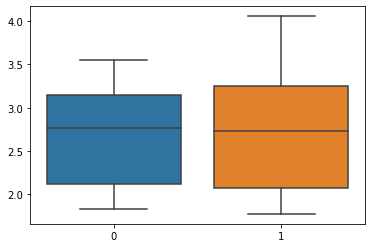

In [ ]:
# Now, we will vary the value of max_iter from 10 to 10000000000

import random
import numpy as np
import seaborn as sns

NumberOfSamples = 1000
featureDimension = 10
weights = np.random.rand(1, featureDimension) # w is kept fixed and it includes the bias term i.e. w_0
bias = 1
noise_variance = 0.25 # noise_var is kept fixed
eta = 0.01 # learning rate is kept fixed
epsilon = 0.5 # min_change_nrmse is kept fixed
Lambda = 0

def nrmse(mse, noise_variance):
  return np.sqrt(mse) / np.sqrt(noise_variance)

# Generating training datasets with different number of training samples
random.seed(11)
x1 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(12)
x2 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(13)
x3 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(14)
x4 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(15)
x5 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(16)
x6 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(17)
x7 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(18)
x8 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(19)
x9 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(20)
x10 = generateDataMatrix(NumberOfSamples, featureDimension)

# Now I have generated 10 training datasets. Now I would be splitting each training dataset into a training and validation dataset on a 80-20 split-ratio.
training_data1, validation_data1 = x1[:800,], x1[-200:,]
t1 = generateTargetVector(training_data1, weights, bias, noise_variance)
v1 = generateTargetVector(validation_data1, weights, bias, noise_variance)

training_data2, validation_data2 = x2[:800,], x2[-200:,]
t2 = generateTargetVector(training_data2, weights, bias, noise_variance)
v2 = generateTargetVector(validation_data2, weights, bias, noise_variance)

training_data3, validation_data3 = x3[:800,], x3[-200:,]
t3 = generateTargetVector(training_data3, weights, bias, noise_variance)
v3 = generateTargetVector(validation_data3, weights, bias, noise_variance)

training_data4, validation_data4 = x4[:800,], x4[-200:,]
t4 = generateTargetVector(training_data4, weights, bias, noise_variance)
v4 = generateTargetVector(validation_data4, weights, bias, noise_variance)

training_data5, validation_data5 = x5[:800,], x5[-200:,]
t5 = generateTargetVector(training_data5, weights, bias, noise_variance)
v5 = generateTargetVector(validation_data5, weights, bias, noise_variance)

training_data6, validation_data6 = x6[:800,], x6[-200:,]
t6 = generateTargetVector(training_data6, weights, bias, noise_variance)
v6 = generateTargetVector(validation_data6, weights, bias, noise_variance)

training_data7, validation_data7 = x7[:800,], x7[-200:,]
t7 = generateTargetVector(training_data7, weights, bias, noise_variance)
v7 = generateTargetVector(validation_data7, weights, bias, noise_variance)

training_data8, validation_data8 = x8[:800,], x8[-200:,]
t8 = generateTargetVector(training_data8, weights, bias, noise_variance)
v8 = generateTargetVector(validation_data8, weights, bias, noise_variance)

training_data9, validation_data9 = x9[:800,], x9[-200:,]
t9 = generateTargetVector(training_data9, weights, bias, noise_variance)
v9 = generateTargetVector(validation_data9, weights, bias, noise_variance)

training_data10, validation_data10 = x10[:800,], x10[-200:,]
t10 = generateTargetVector(training_data10, weights, bias, noise_variance)
v10 = generateTargetVector(validation_data10, weights, bias, noise_variance)

w_t1, nrmse_t1 = estimateLRweights(training_data1, t1, eta, 10, epsilon, 0, 0)
w_t2, nrmse_t2 = estimateLRweights(training_data2, t2, eta, 100, epsilon, 0, 0)
w_t3, nrmse_t3 = estimateLRweights(training_data3, t3, eta, 1000, epsilon, 0, 0)
w_t4, nrmse_t4 = estimateLRweights(training_data4, t4, eta, 10000, epsilon, 0, 0)
w_t5, nrmse_t5 = estimateLRweights(training_data5, t5, eta, 100000, epsilon, 0, 0)
w_t6, nrmse_t6 = estimateLRweights(training_data6, t6, eta, 1000000, epsilon, 0, 0)
w_t7, nrmse_t7 = estimateLRweights(training_data7, t7, eta, 10000000, epsilon, 0, 0)
w_t8, nrmse_t8 = estimateLRweights(training_data8, t8, eta, 100000000, epsilon, 0, 0)
w_t9, nrmse_t9 = estimateLRweights(training_data9, t9, eta, 1000000000, epsilon, 0, 0)
w_t10, nrmse_t10 = estimateLRweights(training_data10, t10, eta, 10000000000, epsilon, 0, 0)

mse_v1 = computeMSE(computeLRestimate(validation_data1, w_t1), v1)
mse_v2 = computeMSE(computeLRestimate(validation_data2, w_t2), v2)
mse_v3 = computeMSE(computeLRestimate(validation_data3, w_t3), v3)
mse_v4 = computeMSE(computeLRestimate(validation_data4, w_t4), v4)
mse_v5 = computeMSE(computeLRestimate(validation_data5, w_t5), v5)
mse_v6 = computeMSE(computeLRestimate(validation_data6, w_t6), v6)
mse_v7 = computeMSE(computeLRestimate(validation_data7, w_t7), v7)
mse_v8 = computeMSE(computeLRestimate(validation_data8, w_t8), v8)
mse_v9 = computeMSE(computeLRestimate(validation_data9, w_t9), v9)
mse_v10 = computeMSE(computeLRestimate(validation_data10, w_t10), v10)

nrmse_t = np.array([nrmse_t1, nrmse_t2, nrmse_t3, nrmse_t4, nrmse_t5, nrmse_t6, nrmse_t7, nrmse_t8, nrmse_t9, nrmse_t10])

mse_v = np.array([mse_v1, mse_v2, mse_v3, mse_v4, mse_v5, mse_v6, mse_v7, mse_v8, mse_v9, mse_v10])
nrmse_v = nrmse(mse_v, noise_variance)

plot_arr = [nrmse_t, nrmse_v]
sns.boxplot(data=plot_arr)

# Observations : 

1.  Spread for Validation_NRMSE > Spread for Training_NRMSE
2.  Mean for Validation_NRMSE > Mean for Training_NRMSE

# Potential Reason :    
As I am training the model on the training dataset for large number of iterations (by increasing max_iter and setting epsilon to 0), the model is possibly overfitting. Hence, it would not be able to generalize well on unseen data i.e. the validation dataset which also explains when the mean of the Validation_NRMSE > mean of theTraining_NRMSE

#Task 13 (h) : Training and validation NRMSE obtained using gradient descent with eta

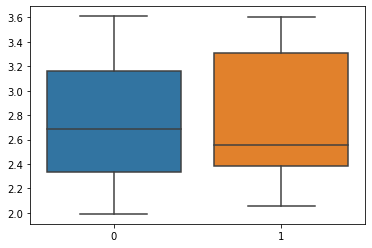

In [15]:
# Now, we will vary the value of eta from 1 to 0.000000001

import random
import numpy as np
import seaborn as sns

NumberOfSamples = 1000
featureDimension = 10
weights = np.random.rand(1, featureDimension) # w is kept fixed
bias = 1 # bias is kept fixed
noise_variance = 0.25 # noise_var is kept fixed
max_iter = 1000 # max_iter is kept fixed
epsilon = 0.5 # min_change_nrmse is kept fixed
Lambda = 0

def nrmse(mse, noise_variance):
  return np.sqrt(mse) / np.sqrt(noise_variance)

# Generating training datasets with different number of training samples
random.seed(11)
x1 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(12)
x2 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(13)
x3 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(14)
x4 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(15)
x5 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(16)
x6 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(17)
x7 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(18)
x8 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(19)
x9 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(20)
x10 = generateDataMatrix(NumberOfSamples, featureDimension)

# Now I have generated 10 training datasets. Now I would be splitting each training dataset into a training and validation dataset on a 80-20 split-ratio.
training_data1, validation_data1 = x1[:800,], x1[-200:,]
t1 = generateTargetVector(training_data1, weights, bias, noise_variance)
v1 = generateTargetVector(validation_data1, weights, bias, noise_variance)

training_data2, validation_data2 = x2[:800,], x2[-200:,]
t2 = generateTargetVector(training_data2, weights, bias, noise_variance)
v2 = generateTargetVector(validation_data2, weights, bias, noise_variance)

training_data3, validation_data3 = x3[:800,], x3[-200:,]
t3 = generateTargetVector(training_data3, weights, bias, noise_variance)
v3 = generateTargetVector(validation_data3, weights, bias, noise_variance)

training_data4, validation_data4 = x4[:800,], x4[-200:,]
t4 = generateTargetVector(training_data4, weights, bias, noise_variance)
v4 = generateTargetVector(validation_data4, weights, bias, noise_variance)

training_data5, validation_data5 = x5[:800,], x5[-200:,]
t5 = generateTargetVector(training_data5, weights, bias, noise_variance)
v5 = generateTargetVector(validation_data5, weights, bias, noise_variance)

training_data6, validation_data6 = x6[:800,], x6[-200:,]
t6 = generateTargetVector(training_data6, weights, bias, noise_variance)
v6 = generateTargetVector(validation_data6, weights, bias, noise_variance)

training_data7, validation_data7 = x7[:800,], x7[-200:,]
t7 = generateTargetVector(training_data7, weights, bias, noise_variance)
v7 = generateTargetVector(validation_data7, weights, bias, noise_variance)

training_data8, validation_data8 = x8[:800,], x8[-200:,]
t8 = generateTargetVector(training_data8, weights, bias, noise_variance)
v8 = generateTargetVector(validation_data8, weights, bias, noise_variance)

training_data9, validation_data9 = x9[:800,], x9[-200:,]
t9 = generateTargetVector(training_data9, weights, bias, noise_variance)
v9 = generateTargetVector(validation_data9, weights, bias, noise_variance)

training_data10, validation_data10 = x10[:800,], x10[-200:,]
t10 = generateTargetVector(training_data10, weights, bias, noise_variance)
v10 = generateTargetVector(validation_data10, weights, bias, noise_variance)

w_t1, nrmse_t1 = estimateLRweights(training_data1, t1, 1, max_iter, epsilon, 0, 0)
w_t2, nrmse_t2 = estimateLRweights(training_data2, t2, 0.1, max_iter, epsilon, 0, 0)
w_t3, nrmse_t3 = estimateLRweights(training_data3, t3, 0.01, max_iter, epsilon, 0, 0)
w_t4, nrmse_t4 = estimateLRweights(training_data4, t4, 0.001, max_iter, epsilon, 0, 0)
w_t5, nrmse_t5 = estimateLRweights(training_data5, t5, 0.0001, max_iter, epsilon, 0, 0)
w_t6, nrmse_t6 = estimateLRweights(training_data6, t6, 0.00001, max_iter, epsilon, 0, 0)
w_t7, nrmse_t7 = estimateLRweights(training_data7, t7, 0.000001, max_iter, epsilon, 0, 0)
w_t8, nrmse_t8 = estimateLRweights(training_data8, t8, 0.0000001, max_iter, epsilon, 0, 0)
w_t9, nrmse_t9 = estimateLRweights(training_data9, t9, 0.00000001, max_iter, epsilon, 0, 0)
w_t10, nrmse_t10 = estimateLRweights(training_data10, t10, 0.000000001, max_iter, epsilon, 0, 0)

mse_v1 = computeMSE(computeLRestimate(validation_data1, w_t1), v1)
mse_v2 = computeMSE(computeLRestimate(validation_data2, w_t2), v2)
mse_v3 = computeMSE(computeLRestimate(validation_data3, w_t3), v3)
mse_v4 = computeMSE(computeLRestimate(validation_data4, w_t4), v4)
mse_v5 = computeMSE(computeLRestimate(validation_data5, w_t5), v5)
mse_v6 = computeMSE(computeLRestimate(validation_data6, w_t6), v6)
mse_v7 = computeMSE(computeLRestimate(validation_data7, w_t7), v7)
mse_v8 = computeMSE(computeLRestimate(validation_data8, w_t8), v8)
mse_v9 = computeMSE(computeLRestimate(validation_data9, w_t9), v9)
mse_v10 = computeMSE(computeLRestimate(validation_data10, w_t10), v10)

nrmse_t = np.array([nrmse_t1, nrmse_t2, nrmse_t3, nrmse_t4, nrmse_t5, nrmse_t6, nrmse_t7, nrmse_t8, nrmse_t9, nrmse_t10])

mse_v = np.array([mse_v1, mse_v2, mse_v3, mse_v4, mse_v5, mse_v6, mse_v7, mse_v8, mse_v9, mse_v10])
nrmse_v = nrmse(mse_v, noise_variance)

plot_arr = [nrmse_t, nrmse_v]
sns.boxplot(data=plot_arr)

# Observations : 
1.  Mean for Validation_NRMSE > Mean for Training_NRMSE

# Potential Reason :    
A smaller learning rate makes the model converge slowly to the global minimum loss and hence would require more training epochs (more time to train) due to the smaller changes made to the weights in every update, whereas a larger learning rate would result in rapid changes and hence require fewer training epochs. However, if the learning rate is too large then it might not be ever able to converge to the global minimum loss and might keep oscillating about that point.

# Task 13 (i) : Time taken to solve gradient descent with number of samples and number of variables and its breaking points

Text(0, 0.5, 'Time Taken for Gradient Descent')

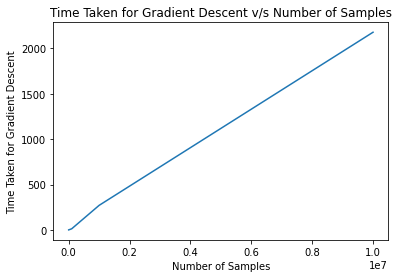

In [158]:
# Keep max_iter fixed and eta -> small 
# Varying the number of samples

import random
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

featureDimension = 10
weights = np.random.rand(1, featureDimension)
bias = 1
noise_variance = 0.25

max_iter = 1000
eta = 0.01
epsilon = 0
Lambda1 = 0
Lambda2 = 0

def nrmse(mse, noise_variance):
  return np.sqrt(mse) / np.sqrt(noise_variance)

# Generating training datasets with different number of training samples
random.seed(10)
x1 = generateDataMatrix(10, featureDimension)
t1 = generateTargetVector(x1, weights, bias, noise_variance)

x2 = generateDataMatrix(100, featureDimension)
t2 = generateTargetVector(x2, weights, bias, noise_variance)

x3 = generateDataMatrix(1000, featureDimension)
t3 = generateTargetVector(x3, weights, bias, noise_variance)

x4 = generateDataMatrix(10000, featureDimension)
t4 = generateTargetVector(x4, weights, bias, noise_variance)

x5 = generateDataMatrix(100000, featureDimension)
t5 = generateTargetVector(x5, weights, bias, noise_variance)

x6 = generateDataMatrix(1000000, featureDimension)
t6 = generateTargetVector(x6, weights, bias, noise_variance)

x7 = generateDataMatrix(10000000, featureDimension)
t7 = generateTargetVector(x7, weights, bias, noise_variance)


time_samples = []

start = time.time()
w_t1, nrmse_t1 = estimateLRweights(x1, t1, eta, max_iter, epsilon, 0, 0)
end = time.time()
time_samples.append(end-start)

start = time.time()
w_t2, nrmse_t2 = estimateLRweights(x2, t2, eta, max_iter, epsilon, 0, 0)
end = time.time()
time_samples.append(end-start)

start = time.time()
w_t3, nrmse_t3 = estimateLRweights(x3, t3, eta, max_iter, epsilon, 0, 0)
end = time.time()
time_samples.append(end-start)

start = time.time()
w_t4, nrmse_t4 = estimateLRweights(x4, t4, eta, max_iter, epsilon, 0, 0)
end = time.time()
time_samples.append(end-start)

start = time.time()
w_t5, nrmse_t5 = estimateLRweights(x5, t5, eta, max_iter, epsilon, 0, 0)
end = time.time()
time_samples.append(end-start)

start = time.time()
w_t6, nrmse_t6 = estimateLRweights(x6, t6, eta, max_iter, epsilon, 0, 0)
end = time.time()
time_samples.append(end-start)

start = time.time()
w_t7, nrmse_t7 = estimateLRweights(x7, t7, eta, max_iter, epsilon, 0, 0)
end = time.time()
time_samples.append(end-start)

time_samples = np.array(time_samples)
n_samples = np.array([10, 100, 1000, 10000, 100000, 1000000, 10000000]) # Google Colab crashes when I use n_sample = 100000000 => breaking point is 100000000

plt.plot(n_samples, time_samples)
plt.title("Time Taken for Gradient Descent v/s Number of Samples")
plt.xlabel("Number of Samples")
plt.ylabel("Time Taken for Gradient Descent")


# Observations : 
1.  The plot between Taken Taken for Gradient Descent v/s Number of Samples starts non-linearly but quickly becomes linear
2. The breaking point observed in this case was for Number of Samples = 100000000

# Potential Reason :    
As the number of samples increase, performing gradient descent increases linearly.
The RAM of the virtual machine Google colab had assigned me crashes when the number of rows = number of samples = 100000000

<ipython-input-4-f135168f80e9>:3: RuntimeWarning: overflow encountered in square
  return np.sum(np.square(y-t)) / N
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
<ipython-input-13-f414cbac5874>:13: RuntimeWarning: invalid value encountered in double_scalars
  if abs(new_nrmse - old_nrmse) < min_change_NRMSE:
<ipython-input-6-4c499d57129d>:4: RuntimeWarning: overflow encountered in multiply
  MSEgradient = np.append(np.sum(2*(computeLRestimate(X, weights)-t))/N, 2*(X.T).dot(computeLRestimate(X, weights)-t)/N) # Appending the gradient of MSE wrt to the bias term to the gradient vector of MSE wrt to the weights vector
<ipython-input-12-eecfbf53bf36>:3: RuntimeWarning: invalid value encountered in multiply
  updated_weights = weights - eta*(computeMSEgradient(X, t, weights) + Lambda2*computeL2gradient(weights) + Lambda1*computeL1gradient(weights))
/usr/local/lib

Text(0, 0.5, 'Time Taken for Gradient Descent')

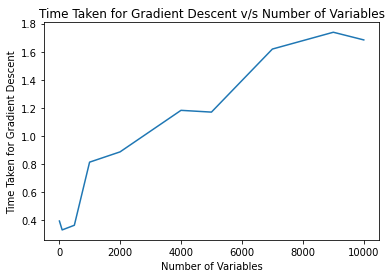

In [18]:
# Keep max_iter fixed and eta -> small 
import random
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

NumberOfSamples = 10
bias = 1
noise_variance = 0.25

max_iter = 1000
eta = 0.01
epsilon = 0
Lambda1 = 0
Lambda2 = 0

def nrmse(mse, noise_variance):
  return np.sqrt(mse) / np.sqrt(noise_variance)

# Generating training datasets with different number of training samples
random.seed(10)
x1 = generateDataMatrix(NumberOfSamples, 10)
w1 = np.random.rand(1, np.shape(x1)[1])
t1 = generateTargetVector(x1, w1, bias, noise_variance)

x2 = generateDataMatrix(NumberOfSamples, 100)
w2 = np.random.rand(1, np.shape(x2)[1])
t2 = generateTargetVector(x2, w2, bias, noise_variance)

x3 = generateDataMatrix(NumberOfSamples, 500)
w3 = np.random.rand(1, np.shape(x3)[1])
t3 = generateTargetVector(x3, w3, bias, noise_variance)

x4 = generateDataMatrix(NumberOfSamples, 1000)
w4 = np.random.rand(1, np.shape(x4)[1])
t4 = generateTargetVector(x4, w4, bias, noise_variance)

x5 = generateDataMatrix(NumberOfSamples, 2000)
w5 = np.random.rand(1, np.shape(x5)[1])
t5 = generateTargetVector(x5, w5, bias, noise_variance)

x6 = generateDataMatrix(NumberOfSamples, 4000)
w6 = np.random.rand(1, np.shape(x6)[1])
t6 = generateTargetVector(x6, w6, bias, noise_variance)

x7 = generateDataMatrix(NumberOfSamples, 5000)
w7 = np.random.rand(1, np.shape(x7)[1])
t7 = generateTargetVector(x7, w7, bias, noise_variance)

x8 = generateDataMatrix(NumberOfSamples, 7000)
w8 = np.random.rand(1, np.shape(x8)[1])
t8 = generateTargetVector(x8, w8, bias, noise_variance)

x9 = generateDataMatrix(NumberOfSamples, 9000)
w9 = np.random.rand(1, np.shape(x9)[1])
t9 = generateTargetVector(x9, w9, bias, noise_variance)

x10 = generateDataMatrix(NumberOfSamples, 9000)
w10 = np.random.rand(1, np.shape(x10)[1])
t10 = generateTargetVector(x10, w10, bias, noise_variance)


time_vars = []

start = time.time()
w_t1, nrmse_t1 = estimateLRweights(x1, t1, eta, max_iter, epsilon, 0, 0)
end = time.time()
time_vars.append(end-start)

start = time.time()
w_t2, nrmse_t2 = estimateLRweights(x2, t2, eta, max_iter, epsilon, 0, 0)
end = time.time()
time_vars.append(end-start)

start = time.time()
w_t3, nrmse_t3 = estimateLRweights(x3, t3, eta, max_iter, epsilon, 0, 0)
end = time.time()
time_vars.append(end-start)

start = time.time()
w_t4, nrmse_t4 = estimateLRweights(x4, t4, eta, max_iter, epsilon, 0, 0)
end = time.time()
time_vars.append(end-start)

start = time.time()
w_t5, nrmse_t5 = estimateLRweights(x5, t5, eta, max_iter, epsilon, 0, 0)
end = time.time()
time_vars.append(end-start)

start = time.time()
w_t6, nrmse_t6 = estimateLRweights(x6, t6, eta, max_iter, epsilon, 0, 0)
end = time.time()
time_vars.append(end-start)

start = time.time()
w_t7, nrmse_t7 = estimateLRweights(x7, t7, eta, max_iter, epsilon, 0, 0)
end = time.time()
time_vars.append(end-start)

start = time.time()
w_t8, nrmse_t8 = estimateLRweights(x8, t8, eta, max_iter, epsilon, 0, 0)
end = time.time()
time_vars.append(end-start)

start = time.time()
w_t9, nrmse_t9 = estimateLRweights(x9, t9, eta, max_iter, epsilon, 0, 0)
end = time.time()
time_vars.append(end-start)

start = time.time()
w_t10, nrmse_t10 = estimateLRweights(x10, t10, eta, max_iter, epsilon, 0, 0)
end = time.time()
time_vars.append(end-start)


time_vars = np.array(time_vars)
n_vars = np.array([10, 100, 500, 1000, 2000, 4000, 5000, 7000, 9000, 10000]) # Google Colab crashes when I use n_vars = 100000

plt.plot(n_vars, time_vars)
plt.title("Time Taken for Gradient Descent v/s Number of Variables")
plt.xlabel("Number of Variables")
plt.ylabel("Time Taken for Gradient Descent")

# Observations : 
1.  The plot between Taken Taken for Gradient Descent v/s Number of Variables increases non-linearly
2. The breaking point observed in this case was for Number of Variables = 100000

# Potential Reason :    
As the number of variables increase, performing gradient descent increases non-linearly.
The RAM of the virtual machine Google colab had assigned me crashes when the number of columns = number of rows = 100000

# Task 13 (k) : Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda2

Printing the number of nearly zero weights obtained using gradient descent by varying the value of lambda2 with a threshold of 0.05
With lambda2 = 0.1 :  0
With lambda2 = 1 :  0
With lambda2 = 2 :  0
With lambda2 = 3 :  0
With lambda2 = 4 :  2
With lambda2 = 5 :  2
With lambda2 = 6 :  2
With lambda2 = 7 :  3
With lambda2 = 8 :  3
With lambda2 = 9 :  3
Minimum NRMSE was obtained using lambda2 = 0.1


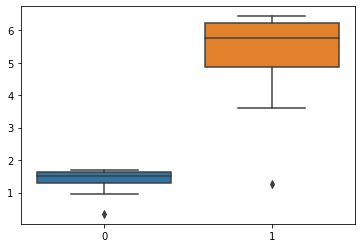

In [19]:
# We are looking for how L2 normalization shrink the weights. Does it make them zero? For what value of lambda? Keep w, noise_var etc. fixed.

import math
import random
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

def nrmse(mse, noise_variance):
  return np.sqrt(mse) / np.sqrt(noise_variance)

def count_zeros(weights, threshold):
  count = 0
  for i in range(np.shape(weights)[1]):
    if abs(weights[0][i]) < threshold:
      count += 1
  return count

FeatureDimension = 10
NumberOfSamples = 1000
bias = 1
noise_variance = 0.25
eta = 0.01
epsilon = 0.001
max_iter = 1000

threshold = 0.05

x = generateDataMatrix(NumberOfSamples, FeatureDimension)
w = np.random.randn(1, FeatureDimension)

# Splitting the dataset into training data and validation data using 80-20 split
training_data, validation_data = x[:800,], x[-200:,]
t, v = generateTargetVector(training_data, w, bias, noise_variance), generateTargetVector(validation_data, w, bias, noise_variance)

w_t1, nrmse_t1 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 0, 0.1)
w_t2, nrmse_t2 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 0, 1)
w_t3, nrmse_t3 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 0, 2)
w_t4, nrmse_t4 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 0, 3)
w_t5, nrmse_t5 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 0, 4)
w_t6, nrmse_t6 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 0, 5)
w_t7, nrmse_t7 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 0, 6)
w_t8, nrmse_t8 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 0, 7)
w_t9, nrmse_t9 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 0, 8)
w_t10, nrmse_t10 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 0, 9)

mse_v1 = computeMSE(computeLRestimate(validation_data, w_t1), v)
mse_v2 = computeMSE(computeLRestimate(validation_data, w_t2), v)
mse_v3 = computeMSE(computeLRestimate(validation_data, w_t3), v)
mse_v4 = computeMSE(computeLRestimate(validation_data, w_t4), v)
mse_v5 = computeMSE(computeLRestimate(validation_data, w_t5), v)
mse_v6 = computeMSE(computeLRestimate(validation_data, w_t6), v)
mse_v7 = computeMSE(computeLRestimate(validation_data, w_t7), v)
mse_v8 = computeMSE(computeLRestimate(validation_data, w_t8), v)
mse_v9 = computeMSE(computeLRestimate(validation_data, w_t9), v)
mse_v10 = computeMSE(computeLRestimate(validation_data, w_t10), v)

nrmse_t = np.array([nrmse_t1, nrmse_t2, nrmse_t3, nrmse_t4, nrmse_t5, nrmse_t6, nrmse_t7, nrmse_t8, nrmse_t9, nrmse_t10])

mse_v = np.array([mse_v1, mse_v2, mse_v3, mse_v4, mse_v5, mse_v6, mse_v7, mse_v8, mse_v9, mse_v10])
nrmse_v = nrmse(mse_v, noise_variance)

plot_arr = [nrmse_t, nrmse_v]
sns.boxplot(data=plot_arr)

print("Printing the number of nearly zero weights obtained using gradient descent by varying the value of lambda2 with a threshold of {}".format(threshold))
print("With lambda2 = 0.1 : ", count_zeros(w_t1, threshold))
print("With lambda2 = 1 : ", count_zeros(w_t2, threshold))
print("With lambda2 = 2 : ", count_zeros(w_t3, threshold))
print("With lambda2 = 3 : ", count_zeros(w_t4, threshold))
print("With lambda2 = 4 : ", count_zeros(w_t5, threshold))
print("With lambda2 = 5 : ", count_zeros(w_t6, threshold))
print("With lambda2 = 6 : ", count_zeros(w_t7, threshold))
print("With lambda2 = 7 : ", count_zeros(w_t8, threshold))
print("With lambda2 = 8 : ", count_zeros(w_t9, threshold))
print("With lambda2 = 9 : ", count_zeros(w_t10, threshold))
if np.argmin(nrmse_v) == 0:
  optimal_lambda2 = 0.1
else:
  optimal_lambda2 = np.argmin(nrmse_v)
print("Minimum NRMSE was obtained using lambda2 = {}".format(optimal_lambda2))

# Observations : 
1.  Mean of Training_NRMSE < Mean of Validation_NRMSE
2. Spread of Training_NRMSE < Spread of Validation_NRMSE

# Potential Reason :    
The introduction of the regularization term makes sure that our model is not overfitting to the training data. This allows it to generalize better on unseen data. In this way, the L2 regularization deals with independent variables that are highly correlated by constricting the coefficient and keeping all the variables.


When value of lambda2 is too high, the model will be simple, and can underfit the data. The model won't learn enough about the training data to make useful predictions.

When the value of lambda2 is too low, the model will be more complex, and can overfit the data. The model will learn too much about the particularities of the training data, and won't be able to generalize to new data.

L2 regularization tries to estimate the mean of the data to avoid overfitting.

# Task 13 (l) : Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda1

[0.29213748 0.83391211 1.50017388 1.83112221 1.925352   1.96911333
 1.9461472  1.95738699 1.94690203 1.95582941]
-----
[1.14848539 3.38908743 6.18740507 7.67885617 7.98051272 8.21148065
 8.11403099 8.19813759 8.11005056 8.18530208]
Printing the number of nearly zero weights obtained using gradient descent by varying the value of lambda1 with a threshold of 0.05
With lambda1 = 0.1 :  1
With lambda1 = 1 :  2
With lambda1 = 2 :  5
With lambda1 = 3 :  7
With lambda1 = 4 :  8
With lambda1 = 5 :  8
With lambda1 = 6 :  6
With lambda1 = 7 :  6
With lambda1 = 8 :  4
With lambda1 = 9 :  7
Minimum NRMSE was obtained using lambda1 = 0.1


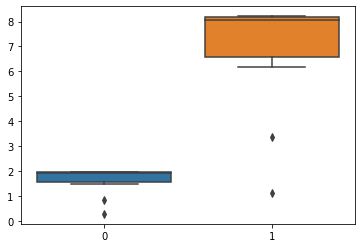

In [156]:
# We are looking for how L1 normalization shrink the weights. Does it make them zero? For what value of lambda? Keep w, noise_var etc. fixed.

import math
import random
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt

def nrmse(mse, noise_variance):
  return np.sqrt(mse) / np.sqrt(noise_variance)

def count_zeros(weights, threshold):
  count = 0
  for i in range(np.shape(weights)[1]):
    if abs(weights[0][i]) < threshold:
      count += 1
  return count

FeatureDimension = 10
NumberOfSamples = 1000
bias = 1
noise_variance = 0.25
eta = 0.01
epsilon = 0.001
max_iter = 1000

threshold = 0.05

x = generateDataMatrix(NumberOfSamples, FeatureDimension)
w = np.random.randn(1, FeatureDimension)

# Splitting the dataset into training data and validation data using 80-20 split
training_data, validation_data = x[:800,], x[-200:,]
t, v = generateTargetVector(training_data, w, bias, noise_variance), generateTargetVector(validation_data, w, bias, noise_variance)

w_t1, nrmse_t1 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 0.1, 0)
w_t2, nrmse_t2 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 1, 0)
w_t3, nrmse_t3 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 2, 0)
w_t4, nrmse_t4 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 3, 0)
w_t5, nrmse_t5 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 4, 0)
w_t6, nrmse_t6 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 5, 0)
w_t7, nrmse_t7 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 6, 0)
w_t8, nrmse_t8 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 7, 0)
w_t9, nrmse_t9 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 8, 0)
w_t10, nrmse_t10 = estimateLRweights(training_data, t, eta, max_iter, epsilon, 9, 0)

mse_v1 = computeMSE(computeLRestimate(validation_data, w_t1), v)
mse_v2 = computeMSE(computeLRestimate(validation_data, w_t2), v)
mse_v3 = computeMSE(computeLRestimate(validation_data, w_t3), v)
mse_v4 = computeMSE(computeLRestimate(validation_data, w_t4), v)
mse_v5 = computeMSE(computeLRestimate(validation_data, w_t5), v)
mse_v6 = computeMSE(computeLRestimate(validation_data, w_t6), v)
mse_v7 = computeMSE(computeLRestimate(validation_data, w_t7), v)
mse_v8 = computeMSE(computeLRestimate(validation_data, w_t8), v)
mse_v9 = computeMSE(computeLRestimate(validation_data, w_t9), v)
mse_v10 = computeMSE(computeLRestimate(validation_data, w_t10), v)

nrmse_t = np.array([nrmse_t1, nrmse_t2, nrmse_t3, nrmse_t4, nrmse_t5, nrmse_t6, nrmse_t7, nrmse_t8, nrmse_t9, nrmse_t10])

mse_v = np.array([mse_v1, mse_v2, mse_v3, mse_v4, mse_v5, mse_v6, mse_v7, mse_v8, mse_v9, mse_v10])
nrmse_v = nrmse(mse_v, noise_variance)

plot_arr = [nrmse_t, nrmse_v]
sns.boxplot(data=plot_arr)

print("Printing the number of nearly zero weights obtained using gradient descent by varying the value of lambda1 with a threshold of {}".format(threshold))
print("With lambda1 = 0.1 : ", count_zeros(w_t1, threshold))
print("With lambda1 = 1 : ", count_zeros(w_t2, threshold))
print("With lambda1 = 2 : ", count_zeros(w_t3, threshold))
print("With lambda1 = 3 : ", count_zeros(w_t4, threshold))
print("With lambda1 = 4 : ", count_zeros(w_t5, threshold))
print("With lambda1 = 5 : ", count_zeros(w_t6, threshold))
print("With lambda1 = 6 : ", count_zeros(w_t7, threshold))
print("With lambda1 = 7 : ", count_zeros(w_t8, threshold))
print("With lambda1 = 8 : ", count_zeros(w_t9, threshold))
print("With lambda1 = 9 : ", count_zeros(w_t10, threshold))
if np.argmin(nrmse_v) == 0:
  optimal_lambda1 = 0.1
else:
  optimal_lambda1 = np.argmin(nrmse_v)
print("Minimum NRMSE was obtained using lambda1 = {}".format(optimal_lambda1))

# Observations : 
1.  Mean of Training_NRMSE < Mean of Validation_NRMSE
2. Spread of Training_NRMSE < Spread of Validation_NRMSE

# Potential Reason :    
The introduction of the regularization term makes sure that our model is not overfitting to the training data. This allows it to generalize better on unseen data. In this way, the L1 regularization deals with independent variables that are highly correlated by constricting the coefficient and keeping all the variables.


When value of lambda2 is too high, the model will be simple, and can underfit the data. The model won't learn enough about the training data to make useful predictions.

When the value of lambda2 is too low, the model will be more complex, and can overfit the data. The model will learn too much about the particularities of the training data, and won't be able to generalize to new data.

L1 regularization tries to estimate the median of the data to avoid overfitting.

# Task 13 (m) : Training and validation NRMSE for optimal lambda2 with noise variance

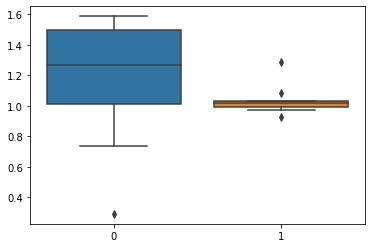

In [152]:
# Vary noise variance and keep lambda2 to be optimal

import random
import numpy as np
import seaborn as sns

NumberOfSamples = 1000
featureDimension = 10
weights = np.random.rand(1, featureDimension) # w is kept fixed
eta = 0.01 # eta is kept fixed
bias = 1 # bias is kept fixed
max_iter = 1000 # max_iter is kept fixed
epsilon = 0.001 # min_change_nrmse is kept fixed
noise_variance = 1

optimal_lambda2 = 0.1

def nrmse(mse, noise_variance):
  return np.sqrt(mse) / np.sqrt(noise_variance)

# Generating training datasets with different number of training samples
random.seed(11)
x1 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(12)
x2 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(13)
x3 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(14)
x4 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(15)
x5 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(16)
x6 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(17)
x7 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(18)
x8 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(19)
x9 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(20)
x10 = generateDataMatrix(NumberOfSamples, featureDimension)

# Now I have generated 10 training datasets. Now I would be splitting each training dataset into a training and validation dataset on a 80-20 split-ratio.
training_data1, validation_data1 = x1[:800,], x1[-200:,]
t1 = generateTargetVector(training_data1, weights, bias, 0.1)
v1 = generateTargetVector(validation_data1, weights, bias, 0.1)

training_data2, validation_data2 = x2[:800,], x2[-200:,]
t2 = generateTargetVector(training_data2, weights, bias, 1)
v2 = generateTargetVector(validation_data2, weights, bias, 1)

training_data3, validation_data3 = x3[:800,], x3[-200:,]
t3 = generateTargetVector(training_data3, weights, bias, 2)
v3 = generateTargetVector(validation_data3, weights, bias, 2)

training_data4, validation_data4 = x4[:800,], x4[-200:,]
t4 = generateTargetVector(training_data4, weights, bias, 3)
v4 = generateTargetVector(validation_data4, weights, bias,3)

training_data5, validation_data5 = x5[:800,], x5[-200:,]
t5 = generateTargetVector(training_data5, weights, bias, 4)
v5 = generateTargetVector(validation_data5, weights, bias, 4)

training_data6, validation_data6 = x6[:800,], x6[-200:,]
t6 = generateTargetVector(training_data6, weights, bias, 5)
v6 = generateTargetVector(validation_data6, weights, bias, 5)

training_data7, validation_data7 = x7[:800,], x7[-200:,]
t7 = generateTargetVector(training_data7, weights, bias, 6)
v7 = generateTargetVector(validation_data7, weights, bias, 6)

training_data8, validation_data8 = x8[:800,], x8[-200:,]
t8 = generateTargetVector(training_data8, weights, bias, 7)
v8 = generateTargetVector(validation_data8, weights, bias, 7)

training_data9, validation_data9 = x9[:800,], x9[-200:,]
t9 = generateTargetVector(training_data9, weights, bias, 8)
v9 = generateTargetVector(validation_data9, weights, bias, 8)

training_data10, validation_data10 = x10[:800,], x10[-200:,]
t10 = generateTargetVector(training_data10, weights, bias, 9)
v10 = generateTargetVector(validation_data10, weights, bias, 9)

w_t1, nrmse_t1 = estimateLRweights(training_data1, t1, eta, max_iter, epsilon, 0, optimal_lambda2)
w_t2, nrmse_t2 = estimateLRweights(training_data2, t2, eta, max_iter, epsilon, 0, optimal_lambda2)
w_t3, nrmse_t3 = estimateLRweights(training_data3, t3, eta, max_iter, epsilon, 0, optimal_lambda2)
w_t4, nrmse_t4 = estimateLRweights(training_data4, t4, eta, max_iter, epsilon, 0, optimal_lambda2)
w_t5, nrmse_t5 = estimateLRweights(training_data5, t5, eta, max_iter, epsilon, 0, optimal_lambda2)
w_t6, nrmse_t6 = estimateLRweights(training_data6, t6, eta, max_iter, epsilon, 0, optimal_lambda2)
w_t7, nrmse_t7 = estimateLRweights(training_data7, t7, eta, max_iter, epsilon, 0, optimal_lambda2)
w_t8, nrmse_t8 = estimateLRweights(training_data8, t8, eta, max_iter, epsilon, 0, optimal_lambda2)
w_t9, nrmse_t9 = estimateLRweights(training_data9, t9, eta, max_iter, epsilon, 0, optimal_lambda2)
w_t10, nrmse_t10 = estimateLRweights(training_data10, t10, eta, max_iter, epsilon, 0, optimal_lambda2)

mse_v1 = computeMSE(computeLRestimate(validation_data1, w_t1), v1)
mse_v2 = computeMSE(computeLRestimate(validation_data2, w_t2), v2)
mse_v3 = computeMSE(computeLRestimate(validation_data3, w_t3), v3)
mse_v4 = computeMSE(computeLRestimate(validation_data4, w_t4), v4)
mse_v5 = computeMSE(computeLRestimate(validation_data5, w_t5), v5)
mse_v6 = computeMSE(computeLRestimate(validation_data6, w_t6), v6)
mse_v7 = computeMSE(computeLRestimate(validation_data7, w_t7), v7)
mse_v8 = computeMSE(computeLRestimate(validation_data8, w_t8), v8)
mse_v9 = computeMSE(computeLRestimate(validation_data9, w_t9), v9)
mse_v10 = computeMSE(computeLRestimate(validation_data10, w_t10), v10)

nrmse_v1 = nrmse(mse_v1, 0.1)
nrmse_v2 = nrmse(mse_v2, 1)
nrmse_v3 = nrmse(mse_v3, 2)
nrmse_v4 = nrmse(mse_v4, 3)
nrmse_v5 = nrmse(mse_v5, 4)
nrmse_v6 = nrmse(mse_v6, 5)
nrmse_v7 = nrmse(mse_v7, 6)
nrmse_v8 = nrmse(mse_v8, 7)
nrmse_v9 = nrmse(mse_v9, 8)
nrmse_v10 = nrmse(mse_v10,9)

nrmse_t = np.array([nrmse_t1, nrmse_t2, nrmse_t3, nrmse_t4, nrmse_t5, nrmse_t6, nrmse_t7, nrmse_t8, nrmse_t9, nrmse_t10])
nrmse_v = np.array([nrmse_v1, nrmse_v2, nrmse_v3, nrmse_v4, nrmse_v5, nrmse_v6, nrmse_v7, nrmse_v8, nrmse_v9, nrmse_v10])

plot_arr = [nrmse_t, nrmse_v]
sns.boxplot(data=plot_arr)

# Observations : 

1.   Spread of Validation_NRMSE <  Spread of Training_NRMSE
2.   Mean of Validation_NRMSE < Mean of Training_NRMSE

# Potential Reason :    

The increase in Training_NRMSE can be because of the variance of the noise present in the target vector due to which it is becoming difficult for the model to fit over training data.

# Task 13 (n) : Training and validation NRMSE for optimal lambda1 with noise variance

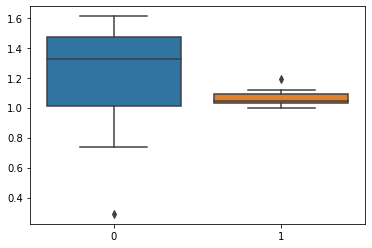

In [153]:
# Vary noise variance and keep lambda1 to be optimal

import random
import numpy as np
import seaborn as sns

NumberOfSamples = 1000
featureDimension = 10
weights = np.random.rand(1, featureDimension) # w is kept fixed
eta = 0.01 # eta is kept fixed
bias = 1 # bias is kept fixed
max_iter = 1000 # max_iter is kept fixed
epsilon = 0.001 # min_change_nrmse is kept fixed
noise_variance = 1

optimal_lambda1 = 0.1

def nrmse(mse, noise_variance):
  return np.sqrt(mse) / np.sqrt(noise_variance)

# Generating training datasets with different number of training samples
random.seed(11)
x1 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(12)
x2 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(13)
x3 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(14)
x4 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(15)
x5 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(16)
x6 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(17)
x7 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(18)
x8 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(19)
x9 = generateDataMatrix(NumberOfSamples, featureDimension)

random.seed(20)
x10 = generateDataMatrix(NumberOfSamples, featureDimension)

# Now I have generated 10 training datasets. Now I would be splitting each training dataset into a training and validation dataset on a 80-20 split-ratio.
training_data1, validation_data1 = x1[:800,], x1[-200:,]
t1 = generateTargetVector(training_data1, weights, bias, 0.1)
v1 = generateTargetVector(validation_data1, weights, bias, 0.1)

training_data2, validation_data2 = x2[:800,], x2[-200:,]
t2 = generateTargetVector(training_data2, weights, bias, 1)
v2 = generateTargetVector(validation_data2, weights, bias, 1)

training_data3, validation_data3 = x3[:800,], x3[-200:,]
t3 = generateTargetVector(training_data3, weights, bias, 2)
v3 = generateTargetVector(validation_data3, weights, bias, 2)

training_data4, validation_data4 = x4[:800,], x4[-200:,]
t4 = generateTargetVector(training_data4, weights, bias, 3)
v4 = generateTargetVector(validation_data4, weights, bias,3)

training_data5, validation_data5 = x5[:800,], x5[-200:,]
t5 = generateTargetVector(training_data5, weights, bias, 4)
v5 = generateTargetVector(validation_data5, weights, bias, 4)

training_data6, validation_data6 = x6[:800,], x6[-200:,]
t6 = generateTargetVector(training_data6, weights, bias, 5)
v6 = generateTargetVector(validation_data6, weights, bias, 5)

training_data7, validation_data7 = x7[:800,], x7[-200:,]
t7 = generateTargetVector(training_data7, weights, bias, 6)
v7 = generateTargetVector(validation_data7, weights, bias, 6)

training_data8, validation_data8 = x8[:800,], x8[-200:,]
t8 = generateTargetVector(training_data8, weights, bias, 7)
v8 = generateTargetVector(validation_data8, weights, bias, 7)

training_data9, validation_data9 = x9[:800,], x9[-200:,]
t9 = generateTargetVector(training_data9, weights, bias, 8)
v9 = generateTargetVector(validation_data9, weights, bias, 8)

training_data10, validation_data10 = x10[:800,], x10[-200:,]
t10 = generateTargetVector(training_data10, weights, bias, 9)
v10 = generateTargetVector(validation_data10, weights, bias, 9)

w_t1, nrmse_t1 = estimateLRweights(training_data1, t1, eta, max_iter, epsilon, optimal_lambda1, 0)
w_t2, nrmse_t2 = estimateLRweights(training_data2, t2, eta, max_iter, epsilon, optimal_lambda1, 0)
w_t3, nrmse_t3 = estimateLRweights(training_data3, t3, eta, max_iter, epsilon, optimal_lambda1, 0)
w_t4, nrmse_t4 = estimateLRweights(training_data4, t4, eta, max_iter, epsilon, optimal_lambda1, 0)
w_t5, nrmse_t5 = estimateLRweights(training_data5, t5, eta, max_iter, epsilon, optimal_lambda1, 0)
w_t6, nrmse_t6 = estimateLRweights(training_data6, t6, eta, max_iter, epsilon, optimal_lambda1, 0)
w_t7, nrmse_t7 = estimateLRweights(training_data7, t7, eta, max_iter, epsilon, optimal_lambda1, 0)
w_t8, nrmse_t8 = estimateLRweights(training_data8, t8, eta, max_iter, epsilon, optimal_lambda1, 0)
w_t9, nrmse_t9 = estimateLRweights(training_data9, t9, eta, max_iter, epsilon, optimal_lambda1, 0)
w_t10, nrmse_t10 = estimateLRweights(training_data10, t10, eta, max_iter, epsilon, optimal_lambda1, 0)

mse_v1 = computeMSE(computeLRestimate(validation_data1, w_t1), v1)
mse_v2 = computeMSE(computeLRestimate(validation_data2, w_t2), v2)
mse_v3 = computeMSE(computeLRestimate(validation_data3, w_t3), v3)
mse_v4 = computeMSE(computeLRestimate(validation_data4, w_t4), v4)
mse_v5 = computeMSE(computeLRestimate(validation_data5, w_t5), v5)
mse_v6 = computeMSE(computeLRestimate(validation_data6, w_t6), v6)
mse_v7 = computeMSE(computeLRestimate(validation_data7, w_t7), v7)
mse_v8 = computeMSE(computeLRestimate(validation_data8, w_t8), v8)
mse_v9 = computeMSE(computeLRestimate(validation_data9, w_t9), v9)
mse_v10 = computeMSE(computeLRestimate(validation_data10, w_t10), v10)

nrmse_v1 = nrmse(mse_v1, 0.1)
nrmse_v2 = nrmse(mse_v2, 1)
nrmse_v3 = nrmse(mse_v3, 2)
nrmse_v4 = nrmse(mse_v4, 3)
nrmse_v5 = nrmse(mse_v5, 4)
nrmse_v6 = nrmse(mse_v6, 5)
nrmse_v7 = nrmse(mse_v7, 6)
nrmse_v8 = nrmse(mse_v8, 7)
nrmse_v9 = nrmse(mse_v9, 8)
nrmse_v10 = nrmse(mse_v10,9)

nrmse_t = np.array([nrmse_t1, nrmse_t2, nrmse_t3, nrmse_t4, nrmse_t5, nrmse_t6, nrmse_t7, nrmse_t8, nrmse_t9, nrmse_t10])
nrmse_v = np.array([nrmse_v1, nrmse_v2, nrmse_v3, nrmse_v4, nrmse_v5, nrmse_v6, nrmse_v7, nrmse_v8, nrmse_v9, nrmse_v10])

plot_arr = [nrmse_t, nrmse_v]
sns.boxplot(data=plot_arr)

# Observations : 

1.   Spread of Validation_NRMSE <  Spread of Training_NRMSE
2.   Mean of Validation_NRMSE < Mean of Training_NRMSE

# Potential Reason :    

The increase in Training_NRMSE can be because of the variance of the noise present in the target vector due to which it is becoming difficult for the model to fit over training data.

# My overall learning points by doing the entire assignment : 

1.   Since a large amount of time was given to us for completing the assignment, I was able to learn to code on my own at my own pace. 
2.   I also got a practical feel of the impact some of the model parameters had on the overall model as I varied the model parameter (like learning rate) and kept everything else same.
3. Since I was able to build a linear regression model completely from scratch using popular libraries like NumPy, I feel more confident on my coding skills. I was learning from making mistakes and debugging them on my own with little help from the internet allowed me to learn much more than I would have if I had taken help from my peers.
4. As I learnt the fundamentals of machine learning, this would certainly allow me to use these techniques to build real world AI applications.
5. Throughout the assignment, I was constantly revising the key concepts taught in class and simultaneously gained the practical know-how. 
6. Certain questions really boggled my mind like the different parts within Task 13 for which I had to think outside the box. They surely tested my problem solving skills.
7. The practise of writing copious comments after every line of code also helped me immensely when I sat down after a couple of days or when I was trying to debug a specific part of the code. Furthermore, the practise of having a trailing code block after each and every function, helped me to cross-check if the function is doing exactly what I want it to do.
8. Through this assignment, I was able to develop a deeper understanding of the linear regression model and it's limitations. Along with these, I also gained familiarity with a wide range of techniques and methods like estimating the weights of linear regression using pinv.
9. In a broad sense, I comprehended where I need to go in order to learn more about the techniqes taught in class and those that were not covered in the class 



# References 

1.   For Python related syntax queries : [GeeksForGeeks](https://www.geeksforgeeks.org/)
2.   For Python related debugging queries : [StackOverflow](https://stackoverflow.com/)
3. To get a better understanding of the problem statement : Linear Regression Slides provided by Prof. Amit Sethi, IIT Bombay
4. Bishop - Pattern Recognition And Machine Learning - Springer - 2006 Edition
5. Understanding Regularization in Machine Learning [Regularization](https://towardsdatascience.com/understanding-regularization-in-machine-learning-d7dd0729dde5#:~:text=L2%20Regularization%20or%20Ridge%20regression,-The%20cost%20function&text=The%20value%20of%20lambda%20can%20vary%20from%200%20to%20infinity.)
6. To understand and implement the functionalities provided by the Numpy library - [Numpy](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html)
7. The usage of np.std(t) instead of np.sqrt(noise_variance) in Task 12 was motivated/inspired by **200070053**







